In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import time

from tqdm import tqdm
from collections import Counter
from multiprocessing import Pool, cpu_count
# 代码运行耗时查看器
from line_profiler import LineProfiler
from sklearn.cluster import KMeans

from recall import topk_recall_association_rules_qyxs_icf
from process import load_click_data, data_generate, item_cluster_feat, user_cluster_feat, \
                     matrix_word2vec_embedding, embedding_fea_pca, get_train_test_data, \
                     Pool_feature_concat, phase_submit_save, add_time_statistics, \
                     add_user_statistics, add_item_statistics, load_pool_feature, \
                     remove_pool_feature
from model import train_model_lgb
from metric import metrics_recall 

train_path = '../data/underexpose_train'  
test_path = '../data/underexpose_test'

have not glove
have not glove


/home/zhu/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


# 内容

- item\user的embedding特征做了聚类的类别特征，类别的统计特征
- item\user的交互embedding的pca
- Pool多进程内存问题策略做了调整，做了临时缓存

In [2]:
# train
phase_append = False
flag_test = False
recall_num = 700
topk = 50
# 构造特征时取用户最近点击项目数
click_topn=5
# pca成分数量
pca_n_components=5
# 项目聚类数
item_n_clusters=7
# 用户聚类数
user_n_clusters=7
nrows = None 
# embedding特征与召回数据已有，直接取为True
embedding_feat_read = False
topk_recall_read = False
# 进程处理中数据划分份数或者任务数量
batchs_n = 4
# 进程中open的cpu核数
open_cpu_n = 5



# test
# phase_append = False
# flag_test = True
# recall_num = 50
# topk = 50
# nrows = 1000

# txt与img余弦相似度字典
txt_cosine_similarity_dict = np.load('../data/process/txt_cosine_similarity_dict.npy', allow_pickle=True).item()
img_cosine_similarity_dict = np.load('../data/process/img_cosine_similarity_dict.npy', allow_pickle=True).item()
type(txt_cosine_similarity_dict['42844']['67898'])

numpy.float32

phase: 7
================================== 加载click数据 ==================================
================================== 生成中间数据 ==================================
==================================== 召回 ====================================


32it [00:00, 313.38it/s]

------- association rules matrix 生成 ---------


19801it [01:16, 259.85it/s]
14it [00:00, 131.00it/s]

------- association rules 召回 ---------


19801it [03:12, 96.56it/s] 


-------- 评测召回效果 -------------
-------- 召回效果 -------------
--------:phase:  7  -------------
phase:  7  top_ 0  :  hit_num :  305 hit_rate :  0.01694067984892246  data_num :  18004

phase:  7  top_ 70  :  hit_num :  2325 hit_rate :  0.12913796934014662  data_num :  18004

phase:  7  top_ 140  :  hit_num :  2891 hit_rate :  0.16057542768273717  data_num :  18004

phase:  7  top_ 210  :  hit_num :  3190 hit_rate :  0.17718284825594313  data_num :  18004

phase:  7  top_ 280  :  hit_num :  3389 hit_rate :  0.1882359475672073  data_num :  18004

phase:  7  top_ 350  :  hit_num :  3552 hit_rate :  0.19728949122417241  data_num :  18004

phase:  7  top_ 420  :  hit_num :  3694 hit_rate :  0.20517662741612974  data_num :  18004

phase:  7  top_ 490  :  hit_num :  3807 hit_rate :  0.21145301044212397  data_num :  18004

phase:  7  top_ 560  :  hit_num :  3928 hit_rate :  0.21817373916907354  data_num :  18004

phase:  7  top_ 630  :  hit_num :  4040 hit_rate :  0.22439457898244836  data_num :  

23249it [00:29, 797.42it/s]

------- 构建样本 -----------


26312it [00:33, 796.25it/s]

............... train len= 723275
............... test  len= 310100


26635it [00:33, 799.96it/s]

----------- 加入特征 train -----------


23070it [00:29, 795.31it/s]

------- 构建样本 -----------


53079it [01:07, 731.87it/s]

............... train len= 667800
............... test  len= 321300


53399it [01:07, 777.71it/s]

----------- 加入特征 train -----------


21294it [00:28, 776.00it/s]

------- 构建样本 -----------


78207it [01:40, 746.74it/s]

............... train len= 752500
............... test  len= 310100


78527it [01:40, 784.89it/s]

----------- 加入特征 train -----------


667800it [15:16, 728.80it/s]
712780it [16:09, 712.01it/s]

----------- 加入特征 test -----------


723275it [16:24, 734.84it/s]
756000it [17:03, 738.74it/s]
26447it [00:35, 780.46it/s]]

----------- 加入特征 test -----------


4971it [00:07, 753.58it/s]]]

----------- 加入特征 test -----------


752500it [17:10, 730.13it/s]
80597it [01:47, 760.67it/s]]

----------- 加入特征 test -----------


321300it [07:17, 733.88it/s]
310100it [07:02, 733.42it/s]
316400it [07:09, 737.53it/s]
310100it [06:57, 743.20it/s]


进程结束
分片特征数据拼接
Removed all files of '../cache/pool_feature_part_phase7...'
feature_all的列:  Index(['similarity_d1', 'similarity_d2', 'score_similar', 'dim1_user_0',
       'dim1_user_1', 'dim1_user_2', 'dim1_user_3', 'dim1_user_4',
       'dim1_item_0', 'dim1_item_1', 'dim1_item_2', 'dim1_item_3',
       'dim1_item_4', 'dim2_user_0', 'dim2_user_1', 'dim2_user_2',
       'dim2_user_3', 'dim2_user_4', 'dim2_item_0', 'dim2_item_1',
       'dim2_item_2', 'dim2_item_3', 'dim2_item_4', 'clicked_item_0',
       'clicked_item_0_cnt', 'clicked_item_0_to_item_0_score',
       'item_0_to_clicked_item_0_txt_cosine_sim',
       'item_0_to_clicked_item_0_img_cosine_sim',
       'clicked_item_0_item_cluster', 'clicked_item_0_item_cluster_cnt',
       'clicked_item_0_item_cluster_user_cnt',
       'clicked_item_0_item_cluster_item_cnt', 'clicked_item_1',
       'clicked_item_1_cnt', 'clicked_item_1_to_item_1_score',
       'item_1_to_clicked_item_1_txt_cosine_sim',
       'item_1_to_clicked_item_1_img_c

<Figure size 1080x720 with 0 Axes>

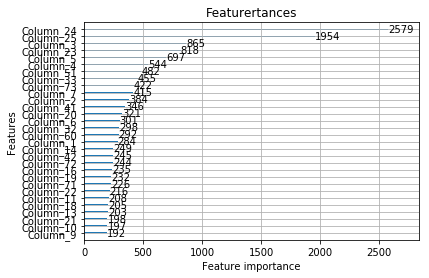

--------------------------- 保存预测文件 ---------------------


In [3]:

now_phase = 7


for phase in range(now_phase, now_phase + 1):  
    print('phase:', phase)
    """
    train_test: 训练测试点击数据
    item_hot_list: 项目热度list
    dict_label_user_item: 训练点击中用户——最后一次点击项目字典
    item_hot_dict: 项目热度字典
    time_feat：用户点击时间特征
    
    """
    click_all, test_user_set = load_click_data(phase, nrows=nrows)
    train_test, item_hot_list, dict_label_user_item, item_hot_dict, time_feat = data_generate(click_all, test_user_set)

    
    
    print('==================================== 召回 ====================================')
    
    # TODO: 增加其它召回
    if topk_recall_read:
        topk_recall = pd.read_pickle('../data/recall/topk_recall_{phase}.pkl'.format(phase=phase))
        matrix_association_rules = np.load('../data/recall/matrix_association_rules_{phase}.npy'.format(phase=phase), allow_pickle=True).item()

    else:
        topk_recall, matrix_association_rules = topk_recall_association_rules_qyxs_icf(
                                                click_all=train_test,
                                                dict_label=dict_label_user_item, 
                                                k=recall_num
                                                )
        topk_recall.to_pickle('../data/recall/topk_recall_{phase}.pkl'.format(phase=phase))
        np.save('../data/recall/matrix_association_rules_{phase}.npy'.format(phase=phase), matrix_association_rules)


    print('-------- 评测召回效果 -------------')
    hit_rate = metrics_recall(topk_recall=topk_recall, phase=phase, k=recall_num, sep=int(recall_num/10))
    print('召回TOP:{k}时, 命中百分比:{hit_rate}'.format(k=recall_num, hit_rate=hit_rate))

    
    
    print('==================================== 排序 ====================================')
    print('-------- 构建特征 ---------')
    
    dim, epochs, learning_rate = 30, 15, 0.1 # 由于内存问题，size改回30
    if embedding_feat_read:
        print('-------- sku1 sku2 sku3 sku4 sku5 user ----------')
        dict_embedding_all_ui_item = np.load('../data/embedding/dict_embedding_all_ui_item_{phase}.npy'.format(phase=phase), 
                                             allow_pickle=True).item()
        
        print('------- user1 user2 user3 user4 user5 sku -------')
        dict_embedding_all_ui_user = np.load('../data/embedding/dict_embedding_all_ui_user_{phase}.npy'.format(phase=phase), 
                                             allow_pickle=True).item()
        
        print('------- item1 item2 item3 item4 item5 -------')
        dict_embedding_item_only = np.load('../data/embedding/dict_embedding_item_only_{phase}.npy'.format(phase=phase), 
                                           allow_pickle=True).item()
        
        print('------- user1 user2 user3 user4 user5 -------')
        dict_embedding_user_only = np.load('../data/embedding/dict_embedding_user_only_{phase}.npy'.format(phase=phase), 
                                           allow_pickle=True).item()

    else:
        print('-------- sku1 sku2 sku3 sku4 sku5 user ----------')
        dict_embedding_all_ui_item = matrix_word2vec_embedding(
                                                                click_all=train_test,
                                                                flag='item',
                                                                mode='all',
                                                                dim=dim,
                                                                epochs=epochs,
                                                                learning_rate=learning_rate
                                                                )
        np.save('../data/embedding/dict_embedding_all_ui_item_{phase}.npy'.format(phase=phase),
               dict_embedding_all_ui_item)


        print('------- user1 user2 user3 user4 user5 sku -------')
        dict_embedding_all_ui_user = matrix_word2vec_embedding(
                                                                click_all=train_test,
                                                                flag='user',
                                                                mode='all',
                                                                dim=dim,
                                                                epochs=epochs,
                                                                learning_rate=learning_rate
                                                                )
        np.save('../data/embedding/dict_embedding_all_ui_user_{phase}.npy'.format(phase=phase),
               dict_embedding_all_ui_user)


        print('------- item1 item2 item3 item4 item5 -------')
        dict_embedding_item_only = matrix_word2vec_embedding(
                                                                click_all=train_test,
                                                                flag='item',
                                                                mode='only',
                                                                dim=dim,
                                                                epochs=epochs,
                                                                learning_rate=learning_rate
                                                                )
        np.save('../data/embedding/dict_embedding_item_only_{phase}.npy'.format(phase=phase),
               dict_embedding_item_only)


        print('------- user1 user2 user3 user4 user5 -------')
        dict_embedding_user_only = matrix_word2vec_embedding(
                                                                click_all=train_test,
                                                                flag='user',
                                                                mode='only',
                                                                dim=dim,
                                                                epochs=epochs,
                                                                learning_rate=learning_rate
                                                                )
        np.save('../data/embedding/dict_embedding_user_only_{phase}.npy'.format(phase=phase),
               dict_embedding_user_only)

        
    
    print('------- Interactive Embedding Feature PCA -----------')

    # dict_embedding_all_ui_item PCA
    dict_embedding = dict_embedding_all_ui_item.copy()
    dict_embedding_all_ui_item = {}
    for i in ['user', 'item']:
        tmp = pd.DataFrame(dict_embedding[i])
        pca_ = embedding_fea_pca(tmp.T, n_components=pca_n_components) # 解释
        tmp_pca = pd.DataFrame(pca_.T)
        tmp_pca.columns = tmp.columns
        dict_embedding_all_ui_item[i] = dict(tmp_pca)
    
    
    # dict_embedding_all_ui_user PCA
    dict_embedding = dict_embedding_all_ui_user.copy()
    dict_embedding_all_ui_user = {}
    for i in ['user', 'item']:
        tmp = pd.DataFrame(dict_embedding[i])
        pca_ = embedding_fea_pca(tmp.T, n_components=pca_n_components) # 解释
        tmp_pca = pd.DataFrame(pca_.T)
        tmp_pca.columns = tmp.columns
        dict_embedding_all_ui_user[i] = dict(tmp_pca)
    print('dict_embedding_all_ui_user是否降维成功........', len(dict_embedding_all_ui_user['user']['1']))    
    del tmp, tmp_pca

    
    
    print('------- user or item Embedding Feature Cluster -----------')

    # dict_embedding_item_only聚类
    item = pd.DataFrame(dict_embedding_item_only['item'])
    km_cluster = KMeans(n_clusters=item_n_clusters, max_iter=300, n_init=40, \
                        init='k-means++') #, n_jobs=-1)
    # 返回类索引
    result = km_cluster.fit_predict(item.T)
    item_cluster = pd.DataFrame({'item_id': item.columns, 'item_cluster': np.int16(result)})
    del item, km_cluster, result, dict_embedding_item_only
    
    # dict_embedding_user_only聚类
    user = pd.DataFrame(dict_embedding_user_only['user'])
    km_cluster = KMeans(n_clusters=user_n_clusters, max_iter=300, n_init=40, \
                        init='k-means++') #, n_jobs=-1)
    # 返回类索引
    result = km_cluster.fit_predict(user.T)
    user_cluster = pd.DataFrame({'user_id': user.columns, 'user_cluster': np.int16(result)})
    del user, km_cluster, result, dict_embedding_user_only
    
    
    # 加载聚类的统计特征
    user_cluster_feat_ = user_cluster_feat(click_all, user_cluster)
    item_cluster_feat_ = item_cluster_feat(click_all, item_cluster)

    del click_all, user_cluster, item_cluster
    
    
    print('------- 特征加工 -----------')

    print('..............topk_recall shape:', topk_recall.shape)

    
#     feature_all = get_train_test_data(topk_recall,
#                   matrix_association_rules, 
#                   time_feat,
#                   user_cluster_feat_,
#                   item_cluster_feat_,
#                   item_hot_dict,
#                   txt_cosine_similarity_dict,
#                   img_cosine_similarity_dict,
#                   dict_embedding_all_ui_item,
#                   dict_embedding_all_ui_user,
#                   flag_test,
#                   click_topn)


#     lprofiler = LineProfiler(get_train_test_data)
#     lprofiler.run('get_train_test_data( topk_recall[:80000], matrix_association_rules, time_feat, user_cluster_feat_, item_cluster_feat_, item_hot_dict, txt_cosine_similarity_dict, img_cosine_similarity_dict, dict_embedding_all_ui_item, dict_embedding_all_ui_user, flag_test=False, click_topn=click_topn)')
#     lprofiler.print_stats()


    # 多进程构建特征
    # 函数get_train_test_data内部已保存结果
    if __name__=='__main__':
        cpu_num = cpu_count()
        
        pool = Pool(open_cpu_n+1) # 创建一个多个进程的进程池
        # 将topk_recall分batchs_n批次，并不是越大越好，启动进程也是需时间的
        batch_size = topk_recall.shape[0]//(batchs_n)
        
        for batch in range(batchs_n):
            start_index = batch * batch_size
            if batch==cpu_num:
                end_index = topk_recall.shape[0]
            else:
                end_index = (1+batch) * batch_size
            p = pool.apply_async(func=get_train_test_data, 
                                                 args=(topk_recall[start_index:end_index],
                                                       matrix_association_rules, 
                                                       time_feat,
                                                       user_cluster_feat_,
                                                       item_cluster_feat_,
                                                       item_hot_dict,
                                                       txt_cosine_similarity_dict,
                                                       img_cosine_similarity_dict,
                                                       dict_embedding_all_ui_item,
                                                       dict_embedding_all_ui_user,
                                                       phase,
                                                       batch,
                                                       flag_test,
                                                       click_topn))            
        pool.close()
        pool.join() 
        
        """
        遍历result列表，取出子进程对象，访问get()方法，获取返回值。（此时所有子进程已执行完毕）
        result[0].get()
        """
        print('进程结束') 
     
    
    
#     # 释放内存
# #     del topk_recall, matrix_association_rules, txt_cosine_similarity_dict, img_cosine_similarity_dict, dict_embedding_all_ui_item, dict_embedding_all_ui_user, dict_embedding_item_only, dict_embedding_user_only
      
    print('分片特征数据拼接')
    # feature_all = Pool_feature_concat(feature_part)
    # 加载暂存的特征数据
    feature_all = load_pool_feature(phase=phase, batchs_n=batchs_n)
    # 删除暂存的特征数据
    remove_pool_feature(phase, batchs_n)


    feature_all = add_time_statistics(feature_all, time_feat)
    feature_all = add_user_statistics(feature_all, user_cluster_feat_)
    feature_all = add_item_statistics(feature_all, item_cluster_feat_)
    print('feature_all的列: ', feature_all.columns)
    
    
    # 数据量太大了，保存占用空间
    # print('特征数据保存')
    # feature_all.to_pickle("../data/process/feature_all_phase{phase}_0002.pkl".format(phase=phase))
    
    ############################## 整体数据特征 ############################## 
    print('--------------------------- 特征数据 ---------------------')
    len_f = len(feature_all)
    len_train = len(feature_all[feature_all['train_flag']=='train'])
    len_test = len(feature_all[feature_all['train_flag']=='test'])
    len_train_1 = len(feature_all[(feature_all['train_flag']=='train') & (feature_all['label']== 1)]) 
    print('所有数据条数', len_f)
    print('训练数据 : ', len_train)
    print('训练数据 label 1 : ', len_train_1)
    print('训练数据 1 / 0 rate : ', len_train_1 * 1.0 / len_f)
    print('测试数据 : ' , len_test)
    print('flag : ', set(feature_all['train_flag']))

    
    ############################## 训练模型 ############################## 
    print('--------------------------- 训练模型 ---------------------')
    submit = train_model_lgb(feature_all, recall_rate=hit_rate, hot_list=item_hot_list, valid=0.2, topk=50, 
                             num_boost_round=1500, early_stopping_rounds=500)

    
    # submit = train_model_rf(feature_all, recall_rate=hit_rate, hot_list=item_hot_list, valid=0.2, topk=50)
    

    print('--------------------------- 保存预测文件 ---------------------')
    phase_submit_save(submit, phase, 50)


phase: 9
================================== 加载click数据 ==================================
================================== 生成中间数据 ==================================
==================================== 召回 ====================================


25it [00:00, 249.12it/s]

------- association rules matrix 生成 ---------


20047it [01:04, 310.77it/s]
12it [00:00, 115.60it/s]

------- association rules 召回 ---------


20047it [02:45, 121.02it/s]


-------- 评测召回效果 -------------
-------- 召回效果 -------------
--------:phase:  9  -------------
phase:  9  top_ 0  :  hit_num :  275 hit_rate :  0.015031429352282044  data_num :  18295

phase:  9  top_ 70  :  hit_num :  2361 hit_rate :  0.12905165345722874  data_num :  18295

phase:  9  top_ 140  :  hit_num :  2871 hit_rate :  0.15692812243782453  data_num :  18295

phase:  9  top_ 210  :  hit_num :  3173 hit_rate :  0.1734353648537852  data_num :  18295

phase:  9  top_ 280  :  hit_num :  3380 hit_rate :  0.18474993167532114  data_num :  18295

phase:  9  top_ 350  :  hit_num :  3538 hit_rate :  0.1933861710849959  data_num :  18295

phase:  9  top_ 420  :  hit_num :  3696 hit_rate :  0.20202241049467068  data_num :  18295

phase:  9  top_ 490  :  hit_num :  3809 hit_rate :  0.20819896146488112  data_num :  18295

phase:  9  top_ 560  :  hit_num :  3914 hit_rate :  0.2139382344902979  data_num :  18295

phase:  9  top_ 630  :  hit_num :  4033 hit_rate :  0.22044274391910357  data_num :  1

21113it [00:26, 811.93it/s]

------- 构建样本 -----------


24465it [00:30, 817.08it/s]

............... train len= 712600
............... test  len= 317800


24957it [00:30, 817.77it/s]

----------- 加入特征 train -----------


20426it [00:26, 757.82it/s]

------- 构建样本 -----------


23451it [00:30, 708.50it/s]

............... train len= 699300
............... test  len= 317275


23774it [00:30, 775.69it/s]

----------- 加入特征 train -----------


20167it [00:26, 668.31it/s]

------- 构建样本 -----------


72940it [01:32, 600.80it/s]

............... train len= 719600
............... test  len= 300125


47298it [01:01, 702.49it/s]

----------- 加入特征 train -----------


712600it [16:00, 742.28it/s]
699300it [15:36, 746.95it/s]
758111it [16:51, 556.07it/s]

----------- 加入特征 test -----------


760200it [16:54, 749.70it/s]
7832it [00:10, 735.07it/s]s]

----------- 加入特征 test -----------


11058it [00:14, 788.09it/s]]

----------- 加入特征 test -----------


719600it [16:02, 747.97it/s]
29439it [00:38, 619.50it/s]

----------- 加入特征 test -----------


291200it [06:27, 750.87it/s]
317800it [07:05, 747.35it/s]
317275it [07:07, 741.99it/s]
300125it [06:43, 743.76it/s]


进程结束
分片特征数据拼接
Removed all files of '../cache/pool_feature_part_phase9...'
feature_all的列:  Index(['similarity_d1', 'similarity_d2', 'score_similar', 'dim1_user_0',
       'dim1_user_1', 'dim1_user_2', 'dim1_user_3', 'dim1_user_4',
       'dim1_item_0', 'dim1_item_1', 'dim1_item_2', 'dim1_item_3',
       'dim1_item_4', 'dim2_user_0', 'dim2_user_1', 'dim2_user_2',
       'dim2_user_3', 'dim2_user_4', 'dim2_item_0', 'dim2_item_1',
       'dim2_item_2', 'dim2_item_3', 'dim2_item_4', 'clicked_item_0',
       'clicked_item_0_cnt', 'clicked_item_0_to_item_0_score',
       'item_0_to_clicked_item_0_txt_cosine_sim',
       'item_0_to_clicked_item_0_img_cosine_sim',
       'clicked_item_0_item_cluster', 'clicked_item_0_item_cluster_cnt',
       'clicked_item_0_item_cluster_user_cnt',
       'clicked_item_0_item_cluster_item_cnt', 'clicked_item_1',
       'clicked_item_1_cnt', 'clicked_item_1_to_item_1_score',
       'item_1_to_clicked_item_1_txt_cosine_sim',
       'item_1_to_clicked_item_1_img_c

<Figure size 1080x720 with 0 Axes>

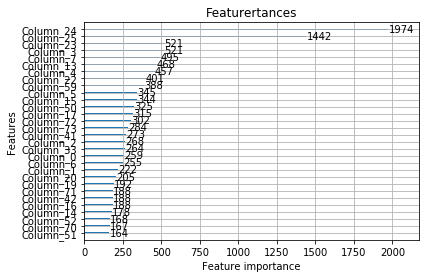

--------------------------- 保存预测文件 ---------------------


In [3]:

now_phase = 9


for phase in range(now_phase, now_phase + 1):  
    print('phase:', phase)
    """
    train_test: 训练测试点击数据
    item_hot_list: 项目热度list
    dict_label_user_item: 训练点击中用户——最后一次点击项目字典
    item_hot_dict: 项目热度字典
    time_feat：用户点击时间特征
    
    """
    click_all, test_user_set = load_click_data(phase, nrows=nrows)
    train_test, item_hot_list, dict_label_user_item, item_hot_dict, time_feat = data_generate(click_all, test_user_set)

    
    
    print('==================================== 召回 ====================================')
    
    # TODO: 增加其它召回
    if topk_recall_read:
        topk_recall = pd.read_pickle('../data/recall/topk_recall_{phase}.pkl'.format(phase=phase))
        matrix_association_rules = np.load('../data/recall/matrix_association_rules_{phase}.npy'.format(phase=phase), allow_pickle=True).item()

    else:
        topk_recall, matrix_association_rules = topk_recall_association_rules_qyxs_icf(
                                                click_all=train_test,
                                                dict_label=dict_label_user_item, 
                                                k=recall_num
                                                )
        topk_recall.to_pickle('../data/recall/topk_recall_{phase}.pkl'.format(phase=phase))
        np.save('../data/recall/matrix_association_rules_{phase}.npy'.format(phase=phase), matrix_association_rules)


    print('-------- 评测召回效果 -------------')
    hit_rate = metrics_recall(topk_recall=topk_recall, phase=phase, k=recall_num, sep=int(recall_num/10))
    print('召回TOP:{k}时, 命中百分比:{hit_rate}'.format(k=recall_num, hit_rate=hit_rate))

    
    
    print('==================================== 排序 ====================================')
    print('-------- 构建特征 ---------')
    
    dim, epochs, learning_rate = 30, 15, 0.1 # 由于内存问题，size改回30
    if embedding_feat_read:
        print('-------- sku1 sku2 sku3 sku4 sku5 user ----------')
        dict_embedding_all_ui_item = np.load('../data/embedding/dict_embedding_all_ui_item_{phase}.npy'.format(phase=phase), 
                                             allow_pickle=True).item()
        
        print('------- user1 user2 user3 user4 user5 sku -------')
        dict_embedding_all_ui_user = np.load('../data/embedding/dict_embedding_all_ui_user_{phase}.npy'.format(phase=phase), 
                                             allow_pickle=True).item()
        
        print('------- item1 item2 item3 item4 item5 -------')
        dict_embedding_item_only = np.load('../data/embedding/dict_embedding_item_only_{phase}.npy'.format(phase=phase), 
                                           allow_pickle=True).item()
        
        print('------- user1 user2 user3 user4 user5 -------')
        dict_embedding_user_only = np.load('../data/embedding/dict_embedding_user_only_{phase}.npy'.format(phase=phase), 
                                           allow_pickle=True).item()

    else:
        print('-------- sku1 sku2 sku3 sku4 sku5 user ----------')
        dict_embedding_all_ui_item = matrix_word2vec_embedding(
                                                                click_all=train_test,
                                                                flag='item',
                                                                mode='all',
                                                                dim=dim,
                                                                epochs=epochs,
                                                                learning_rate=learning_rate
                                                                )
        np.save('../data/embedding/dict_embedding_all_ui_item_{phase}.npy'.format(phase=phase),
               dict_embedding_all_ui_item)


        print('------- user1 user2 user3 user4 user5 sku -------')
        dict_embedding_all_ui_user = matrix_word2vec_embedding(
                                                                click_all=train_test,
                                                                flag='user',
                                                                mode='all',
                                                                dim=dim,
                                                                epochs=epochs,
                                                                learning_rate=learning_rate
                                                                )
        np.save('../data/embedding/dict_embedding_all_ui_user_{phase}.npy'.format(phase=phase),
               dict_embedding_all_ui_user)


        print('------- item1 item2 item3 item4 item5 -------')
        dict_embedding_item_only = matrix_word2vec_embedding(
                                                                click_all=train_test,
                                                                flag='item',
                                                                mode='only',
                                                                dim=dim,
                                                                epochs=epochs,
                                                                learning_rate=learning_rate
                                                                )
        np.save('../data/embedding/dict_embedding_item_only_{phase}.npy'.format(phase=phase),
               dict_embedding_item_only)


        print('------- user1 user2 user3 user4 user5 -------')
        dict_embedding_user_only = matrix_word2vec_embedding(
                                                                click_all=train_test,
                                                                flag='user',
                                                                mode='only',
                                                                dim=dim,
                                                                epochs=epochs,
                                                                learning_rate=learning_rate
                                                                )
        np.save('../data/embedding/dict_embedding_user_only_{phase}.npy'.format(phase=phase),
               dict_embedding_user_only)

        
    
    print('------- Interactive Embedding Feature PCA -----------')

    # dict_embedding_all_ui_item PCA
    dict_embedding = dict_embedding_all_ui_item.copy()
    dict_embedding_all_ui_item = {}
    for i in ['user', 'item']:
        tmp = pd.DataFrame(dict_embedding[i])
        pca_ = embedding_fea_pca(tmp.T, n_components=pca_n_components) # 解释
        tmp_pca = pd.DataFrame(pca_.T)
        tmp_pca.columns = tmp.columns
        dict_embedding_all_ui_item[i] = dict(tmp_pca)
    
    
    # dict_embedding_all_ui_user PCA
    dict_embedding = dict_embedding_all_ui_user.copy()
    dict_embedding_all_ui_user = {}
    for i in ['user', 'item']:
        tmp = pd.DataFrame(dict_embedding[i])
        pca_ = embedding_fea_pca(tmp.T, n_components=pca_n_components) # 解释
        tmp_pca = pd.DataFrame(pca_.T)
        tmp_pca.columns = tmp.columns
        dict_embedding_all_ui_user[i] = dict(tmp_pca)
    print('dict_embedding_all_ui_user是否降维成功........', len(dict_embedding_all_ui_user['user']['1']))    
    del tmp, tmp_pca

    
    
    print('------- user or item Embedding Feature Cluster -----------')

    # dict_embedding_item_only聚类
    item = pd.DataFrame(dict_embedding_item_only['item'])
    km_cluster = KMeans(n_clusters=item_n_clusters, max_iter=300, n_init=40, \
                        init='k-means++') #, n_jobs=-1)
    # 返回类索引
    result = km_cluster.fit_predict(item.T)
    item_cluster = pd.DataFrame({'item_id': item.columns, 'item_cluster': np.int16(result)})
    del item, km_cluster, result, dict_embedding_item_only
    
    # dict_embedding_user_only聚类
    user = pd.DataFrame(dict_embedding_user_only['user'])
    km_cluster = KMeans(n_clusters=user_n_clusters, max_iter=300, n_init=40, \
                        init='k-means++') #, n_jobs=-1)
    # 返回类索引
    result = km_cluster.fit_predict(user.T)
    user_cluster = pd.DataFrame({'user_id': user.columns, 'user_cluster': np.int16(result)})
    del user, km_cluster, result, dict_embedding_user_only
    
    
    # 加载聚类的统计特征
    user_cluster_feat_ = user_cluster_feat(click_all, user_cluster)
    item_cluster_feat_ = item_cluster_feat(click_all, item_cluster)

    del click_all, user_cluster, item_cluster
    
    
    print('------- 特征加工 -----------')

    print('..............topk_recall shape:', topk_recall.shape)

    
#     feature_all = get_train_test_data(topk_recall,
#                   matrix_association_rules, 
#                   time_feat,
#                   user_cluster_feat_,
#                   item_cluster_feat_,
#                   item_hot_dict,
#                   txt_cosine_similarity_dict,
#                   img_cosine_similarity_dict,
#                   dict_embedding_all_ui_item,
#                   dict_embedding_all_ui_user,
#                   flag_test,
#                   click_topn)


#     lprofiler = LineProfiler(get_train_test_data)
#     lprofiler.run('get_train_test_data( topk_recall[:80000], matrix_association_rules, time_feat, user_cluster_feat_, item_cluster_feat_, item_hot_dict, txt_cosine_similarity_dict, img_cosine_similarity_dict, dict_embedding_all_ui_item, dict_embedding_all_ui_user, flag_test=False, click_topn=click_topn)')
#     lprofiler.print_stats()


    # 多进程构建特征
    # 函数get_train_test_data内部已保存结果
    if __name__=='__main__':
        cpu_num = cpu_count()
        
        pool = Pool(open_cpu_n+1) # 创建一个多个进程的进程池
        # 将topk_recall分batchs_n批次，并不是越大越好，启动进程也是需时间的
        batch_size = topk_recall.shape[0]//(batchs_n)
        
        for batch in range(batchs_n):
            start_index = batch * batch_size
            if batch==cpu_num:
                end_index = topk_recall.shape[0]
            else:
                end_index = (1+batch) * batch_size
            p = pool.apply_async(func=get_train_test_data, 
                                                 args=(topk_recall[start_index:end_index],
                                                       matrix_association_rules, 
                                                       time_feat,
                                                       user_cluster_feat_,
                                                       item_cluster_feat_,
                                                       item_hot_dict,
                                                       txt_cosine_similarity_dict,
                                                       img_cosine_similarity_dict,
                                                       dict_embedding_all_ui_item,
                                                       dict_embedding_all_ui_user,
                                                       phase,
                                                       batch,
                                                       flag_test,
                                                       click_topn))            
        pool.close()
        pool.join() 
        
        """
        遍历result列表，取出子进程对象，访问get()方法，获取返回值。（此时所有子进程已执行完毕）
        result[0].get()
        """
        print('进程结束') 
     
    
    
#     # 释放内存
# #     del topk_recall, matrix_association_rules, txt_cosine_similarity_dict, img_cosine_similarity_dict, dict_embedding_all_ui_item, dict_embedding_all_ui_user, dict_embedding_item_only, dict_embedding_user_only
      
    print('分片特征数据拼接')
    # feature_all = Pool_feature_concat(feature_part)
    # 加载暂存的特征数据
    feature_all = load_pool_feature(phase=phase, batchs_n=batchs_n)
    # 删除暂存的特征数据
    remove_pool_feature(phase, batchs_n)


    feature_all = add_time_statistics(feature_all, time_feat)
    feature_all = add_user_statistics(feature_all, user_cluster_feat_)
    feature_all = add_item_statistics(feature_all, item_cluster_feat_)
    print('feature_all的列: ', feature_all.columns)
    
    
    # 数据量太大了，保存占用空间
    # print('特征数据保存')
    # feature_all.to_pickle("../data/process/feature_all_phase{phase}_0002.pkl".format(phase=phase))
    
    ############################## 整体数据特征 ############################## 
    print('--------------------------- 特征数据 ---------------------')
    len_f = len(feature_all)
    len_train = len(feature_all[feature_all['train_flag']=='train'])
    len_test = len(feature_all[feature_all['train_flag']=='test'])
    len_train_1 = len(feature_all[(feature_all['train_flag']=='train') & (feature_all['label']== 1)]) 
    print('所有数据条数', len_f)
    print('训练数据 : ', len_train)
    print('训练数据 label 1 : ', len_train_1)
    print('训练数据 1 / 0 rate : ', len_train_1 * 1.0 / len_f)
    print('测试数据 : ' , len_test)
    print('flag : ', set(feature_all['train_flag']))

    
    ############################## 训练模型 ############################## 
    print('--------------------------- 训练模型 ---------------------')
    submit = train_model_lgb(feature_all, recall_rate=hit_rate, hot_list=item_hot_list, valid=0.2, topk=50, 
                             num_boost_round=1500, early_stopping_rounds=500)

    
    # submit = train_model_rf(feature_all, recall_rate=hit_rate, hot_list=item_hot_list, valid=0.2, topk=50)
    

    print('--------------------------- 保存预测文件 ---------------------')
    phase_submit_save(submit, phase, 50)


phase: 8
================================== 加载click数据 ==================================
================================== 生成中间数据 ==================================
==================================== 召回 ====================================
-------- 评测召回效果 -------------
-------- 召回效果 -------------
--------:phase:  8  -------------
phase:  8  top_ 0  :  hit_num :  321 hit_rate :  0.01776916689731525  data_num :  18065

phase:  8  top_ 70  :  hit_num :  2230 hit_rate :  0.12344312205923055  data_num :  18065

phase:  8  top_ 140  :  hit_num :  2716 hit_rate :  0.15034597287572654  data_num :  18065

phase:  8  top_ 210  :  hit_num :  3046 hit_rate :  0.168613340714088  data_num :  18065

phase:  8  top_ 280  :  hit_num :  3269 hit_rate :  0.18095765292001106  data_num :  18065

phase:  8  top_ 350  :  hit_num :  3437 hit_rate :  0.19025740381954054  data_num :  18065

phase:  8  top_ 420  :  hit_num :  3587 hit_rate :  0.19856075283697758  data_num :  18065

phase:  8  top_ 490  :  hit

21674it [00:27, 796.19it/s]

------- 构建样本 -----------


24861it [00:31, 720.79it/s]

............... train len= 690200
............... test  len= 312200


25183it [00:31, 778.62it/s]

----------- 加入特征 train -----------


46841it [00:59, 791.24it/s]

------- 构建样本 -----------


24388it [00:31, 746.65it/s]

............... train len= 660800
............... test  len= 322700


24705it [00:31, 777.81it/s]

----------- 加入特征 train -----------


19790it [00:26, 785.84it/s]

------- 构建样本 -----------


47193it [01:01, 536.13it/s]

............... train len= 745500
............... test  len= 310800


22902it [00:30, 604.44it/s]

----------- 加入特征 train -----------


660800it [15:04, 730.36it/s]
690200it [15:42, 732.04it/s]
722146it [16:28, 775.60it/s]

----------- 加入特征 test -----------


723100it [16:29, 730.79it/s]
5343it [00:07, 620.58it/s]s]

----------- 加入特征 test -----------


675828it [15:17, 543.20it/s]

----------- 加入特征 test -----------


745500it [16:53, 735.32it/s]
105025it [02:22, 793.59it/s]

----------- 加入特征 test -----------


312200it [07:04, 735.12it/s]
322700it [07:19, 734.69it/s]
326900it [07:23, 736.72it/s]
310800it [06:59, 741.62it/s]


进程结束
分片特征数据拼接
Removed all files of '../cache/pool_feature_part_phase8...'
feature_all的列:  Index(['similarity_d1', 'similarity_d2', 'score_similar', 'dim1_user_0',
       'dim1_user_1', 'dim1_user_2', 'dim1_user_3', 'dim1_user_4',
       'dim1_item_0', 'dim1_item_1', 'dim1_item_2', 'dim1_item_3',
       'dim1_item_4', 'dim2_user_0', 'dim2_user_1', 'dim2_user_2',
       'dim2_user_3', 'dim2_user_4', 'dim2_item_0', 'dim2_item_1',
       'dim2_item_2', 'dim2_item_3', 'dim2_item_4', 'clicked_item_0',
       'clicked_item_0_cnt', 'clicked_item_0_to_item_0_score',
       'item_0_to_clicked_item_0_txt_cosine_sim',
       'item_0_to_clicked_item_0_img_cosine_sim',
       'clicked_item_0_item_cluster', 'clicked_item_0_item_cluster_cnt',
       'clicked_item_0_item_cluster_user_cnt',
       'clicked_item_0_item_cluster_item_cnt', 'clicked_item_1',
       'clicked_item_1_cnt', 'clicked_item_1_to_item_1_score',
       'item_1_to_clicked_item_1_txt_cosine_sim',
       'item_1_to_clicked_item_1_img_c

<Figure size 1080x720 with 0 Axes>

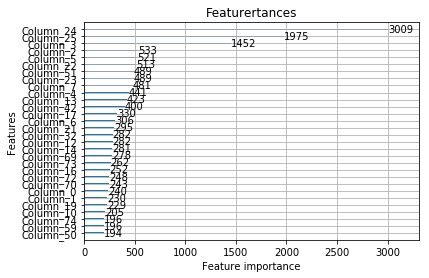

--------------------------- 保存预测文件 ---------------------


In [3]:

now_phase = 8


for phase in range(now_phase, now_phase + 1):  
    print('phase:', phase)
    """
    train_test: 训练测试点击数据
    item_hot_list: 项目热度list
    dict_label_user_item: 训练点击中用户——最后一次点击项目字典
    item_hot_dict: 项目热度字典
    time_feat：用户点击时间特征
    
    """
    click_all, test_user_set = load_click_data(phase, nrows=nrows)
    train_test, item_hot_list, dict_label_user_item, item_hot_dict, time_feat = data_generate(click_all, test_user_set)

    
    
    print('==================================== 召回 ====================================')
    
    # TODO: 增加其它召回
    if topk_recall_read:
        topk_recall = pd.read_pickle('../data/recall/topk_recall_{phase}.pkl'.format(phase=phase))
        matrix_association_rules = np.load('../data/recall/matrix_association_rules_{phase}.npy'.format(phase=phase), allow_pickle=True).item()

    else:
        topk_recall, matrix_association_rules = topk_recall_association_rules_qyxs_icf(
                                                click_all=train_test,
                                                dict_label=dict_label_user_item, 
                                                k=recall_num
                                                )
        topk_recall.to_pickle('../data/recall/topk_recall_{phase}.pkl'.format(phase=phase))
        np.save('../data/recall/matrix_association_rules_{phase}.npy'.format(phase=phase), matrix_association_rules)


    print('-------- 评测召回效果 -------------')
    hit_rate = metrics_recall(topk_recall=topk_recall, phase=phase, k=recall_num, sep=int(recall_num/10))
    print('召回TOP:{k}时, 命中百分比:{hit_rate}'.format(k=recall_num, hit_rate=hit_rate))

    
    
    print('==================================== 排序 ====================================')
    print('-------- 构建特征 ---------')
    
    dim, epochs, learning_rate = 30, 15, 0.1 # 由于内存问题，size改回30
    if embedding_feat_read:
        print('-------- sku1 sku2 sku3 sku4 sku5 user ----------')
        dict_embedding_all_ui_item = np.load('../data/embedding/dict_embedding_all_ui_item_{phase}.npy'.format(phase=phase), 
                                             allow_pickle=True).item()
        
        print('------- user1 user2 user3 user4 user5 sku -------')
        dict_embedding_all_ui_user = np.load('../data/embedding/dict_embedding_all_ui_user_{phase}.npy'.format(phase=phase), 
                                             allow_pickle=True).item()
        
        print('------- item1 item2 item3 item4 item5 -------')
        dict_embedding_item_only = np.load('../data/embedding/dict_embedding_item_only_{phase}.npy'.format(phase=phase), 
                                           allow_pickle=True).item()
        
        print('------- user1 user2 user3 user4 user5 -------')
        dict_embedding_user_only = np.load('../data/embedding/dict_embedding_user_only_{phase}.npy'.format(phase=phase), 
                                           allow_pickle=True).item()

    else:
        print('-------- sku1 sku2 sku3 sku4 sku5 user ----------')
        dict_embedding_all_ui_item = matrix_word2vec_embedding(
                                                                click_all=train_test,
                                                                flag='item',
                                                                mode='all',
                                                                dim=dim,
                                                                epochs=epochs,
                                                                learning_rate=learning_rate
                                                                )
        np.save('../data/embedding/dict_embedding_all_ui_item_{phase}.npy'.format(phase=phase),
               dict_embedding_all_ui_item)


        print('------- user1 user2 user3 user4 user5 sku -------')
        dict_embedding_all_ui_user = matrix_word2vec_embedding(
                                                                click_all=train_test,
                                                                flag='user',
                                                                mode='all',
                                                                dim=dim,
                                                                epochs=epochs,
                                                                learning_rate=learning_rate
                                                                )
        np.save('../data/embedding/dict_embedding_all_ui_user_{phase}.npy'.format(phase=phase),
               dict_embedding_all_ui_user)


        print('------- item1 item2 item3 item4 item5 -------')
        dict_embedding_item_only = matrix_word2vec_embedding(
                                                                click_all=train_test,
                                                                flag='item',
                                                                mode='only',
                                                                dim=dim,
                                                                epochs=epochs,
                                                                learning_rate=learning_rate
                                                                )
        np.save('../data/embedding/dict_embedding_item_only_{phase}.npy'.format(phase=phase),
               dict_embedding_item_only)


        print('------- user1 user2 user3 user4 user5 -------')
        dict_embedding_user_only = matrix_word2vec_embedding(
                                                                click_all=train_test,
                                                                flag='user',
                                                                mode='only',
                                                                dim=dim,
                                                                epochs=epochs,
                                                                learning_rate=learning_rate
                                                                )
        np.save('../data/embedding/dict_embedding_user_only_{phase}.npy'.format(phase=phase),
               dict_embedding_user_only)

        
    
    print('------- Interactive Embedding Feature PCA -----------')

    # dict_embedding_all_ui_item PCA
    dict_embedding = dict_embedding_all_ui_item.copy()
    dict_embedding_all_ui_item = {}
    for i in ['user', 'item']:
        tmp = pd.DataFrame(dict_embedding[i])
        pca_ = embedding_fea_pca(tmp.T, n_components=pca_n_components) # 解释
        tmp_pca = pd.DataFrame(pca_.T)
        tmp_pca.columns = tmp.columns
        dict_embedding_all_ui_item[i] = dict(tmp_pca)
    
    
    # dict_embedding_all_ui_user PCA
    dict_embedding = dict_embedding_all_ui_user.copy()
    dict_embedding_all_ui_user = {}
    for i in ['user', 'item']:
        tmp = pd.DataFrame(dict_embedding[i])
        pca_ = embedding_fea_pca(tmp.T, n_components=pca_n_components) # 解释
        tmp_pca = pd.DataFrame(pca_.T)
        tmp_pca.columns = tmp.columns
        dict_embedding_all_ui_user[i] = dict(tmp_pca)
    print('dict_embedding_all_ui_user是否降维成功........', len(dict_embedding_all_ui_user['user']['1']))    
    del tmp, tmp_pca

    
    
    print('------- user or item Embedding Feature Cluster -----------')

    # dict_embedding_item_only聚类
    item = pd.DataFrame(dict_embedding_item_only['item'])
    km_cluster = KMeans(n_clusters=item_n_clusters, max_iter=300, n_init=40, \
                        init='k-means++') #, n_jobs=-1)
    # 返回类索引
    result = km_cluster.fit_predict(item.T)
    item_cluster = pd.DataFrame({'item_id': item.columns, 'item_cluster': np.int16(result)})
    del item, km_cluster, result, dict_embedding_item_only
    
    # dict_embedding_user_only聚类
    user = pd.DataFrame(dict_embedding_user_only['user'])
    km_cluster = KMeans(n_clusters=user_n_clusters, max_iter=300, n_init=40, \
                        init='k-means++') #, n_jobs=-1)
    # 返回类索引
    result = km_cluster.fit_predict(user.T)
    user_cluster = pd.DataFrame({'user_id': user.columns, 'user_cluster': np.int16(result)})
    del user, km_cluster, result, dict_embedding_user_only
    
    
    # 加载聚类的统计特征
    user_cluster_feat_ = user_cluster_feat(click_all, user_cluster)
    item_cluster_feat_ = item_cluster_feat(click_all, item_cluster)

    del click_all, user_cluster, item_cluster
    
    
    print('------- 特征加工 -----------')

    print('..............topk_recall shape:', topk_recall.shape)

    
#     feature_all = get_train_test_data(topk_recall,
#                   matrix_association_rules, 
#                   time_feat,
#                   user_cluster_feat_,
#                   item_cluster_feat_,
#                   item_hot_dict,
#                   txt_cosine_similarity_dict,
#                   img_cosine_similarity_dict,
#                   dict_embedding_all_ui_item,
#                   dict_embedding_all_ui_user,
#                   flag_test,
#                   click_topn)


#     lprofiler = LineProfiler(get_train_test_data)
#     lprofiler.run('get_train_test_data( topk_recall[:80000], matrix_association_rules, time_feat, user_cluster_feat_, item_cluster_feat_, item_hot_dict, txt_cosine_similarity_dict, img_cosine_similarity_dict, dict_embedding_all_ui_item, dict_embedding_all_ui_user, flag_test=False, click_topn=click_topn)')
#     lprofiler.print_stats()


    # 多进程构建特征
    # 函数get_train_test_data内部已保存结果
    if __name__=='__main__':
        cpu_num = cpu_count()
        
        pool = Pool(open_cpu_n+1) # 创建一个多个进程的进程池
        # 将topk_recall分batchs_n批次，并不是越大越好，启动进程也是需时间的
        batch_size = topk_recall.shape[0]//(batchs_n)
        
        for batch in range(batchs_n):
            start_index = batch * batch_size
            if batch==cpu_num:
                end_index = topk_recall.shape[0]
            else:
                end_index = (1+batch) * batch_size
            p = pool.apply_async(func=get_train_test_data, 
                                                 args=(topk_recall[start_index:end_index],
                                                       matrix_association_rules, 
                                                       time_feat,
                                                       user_cluster_feat_,
                                                       item_cluster_feat_,
                                                       item_hot_dict,
                                                       txt_cosine_similarity_dict,
                                                       img_cosine_similarity_dict,
                                                       dict_embedding_all_ui_item,
                                                       dict_embedding_all_ui_user,
                                                       phase,
                                                       batch,
                                                       flag_test,
                                                       click_topn))            
        pool.close()
        pool.join() 
        
        """
        遍历result列表，取出子进程对象，访问get()方法，获取返回值。（此时所有子进程已执行完毕）
        result[0].get()
        """
        print('进程结束') 
     
    
    
#     # 释放内存
# #     del topk_recall, matrix_association_rules, txt_cosine_similarity_dict, img_cosine_similarity_dict, dict_embedding_all_ui_item, dict_embedding_all_ui_user, dict_embedding_item_only, dict_embedding_user_only
      
    print('分片特征数据拼接')
    # feature_all = Pool_feature_concat(feature_part)
    # 加载暂存的特征数据
    feature_all = load_pool_feature(phase=phase, batchs_n=batchs_n)
    # 删除暂存的特征数据
    remove_pool_feature(phase, batchs_n)


    feature_all = add_time_statistics(feature_all, time_feat)
    feature_all = add_user_statistics(feature_all, user_cluster_feat_)
    feature_all = add_item_statistics(feature_all, item_cluster_feat_)
    print('feature_all的列: ', feature_all.columns)
    
    
    # 数据量太大了，保存占用空间
    # print('特征数据保存')
    # feature_all.to_pickle("../data/process/feature_all_phase{phase}_0002.pkl".format(phase=phase))
    
    ############################## 整体数据特征 ############################## 
    print('--------------------------- 特征数据 ---------------------')
    len_f = len(feature_all)
    len_train = len(feature_all[feature_all['train_flag']=='train'])
    len_test = len(feature_all[feature_all['train_flag']=='test'])
    len_train_1 = len(feature_all[(feature_all['train_flag']=='train') & (feature_all['label']== 1)]) 
    print('所有数据条数', len_f)
    print('训练数据 : ', len_train)
    print('训练数据 label 1 : ', len_train_1)
    print('训练数据 1 / 0 rate : ', len_train_1 * 1.0 / len_f)
    print('测试数据 : ' , len_test)
    print('flag : ', set(feature_all['train_flag']))

    
    ############################## 训练模型 ############################## 
    print('--------------------------- 训练模型 ---------------------')
    submit = train_model_lgb(feature_all, recall_rate=hit_rate, hot_list=item_hot_list, valid=0.2, topk=50, 
                             num_boost_round=1500, early_stopping_rounds=500)

    
    # submit = train_model_rf(feature_all, recall_rate=hit_rate, hot_list=item_hot_list, valid=0.2, topk=50)
    

    print('--------------------------- 保存预测文件 ---------------------')
    phase_submit_save(submit, phase, 50)


phase: 6
================================== 加载click数据 ==================================
================================== 生成中间数据 ==================================
==================================== 召回 ====================================
-------- 评测召回效果 -------------
-------- 召回效果 -------------
--------:phase:  6  -------------
phase:  6  top_ 0  :  hit_num :  361 hit_rate :  0.01943472409152086  data_num :  18575

phase:  6  top_ 70  :  hit_num :  2779 hit_rate :  0.14960969044414535  data_num :  18575

phase:  6  top_ 140  :  hit_num :  3406 hit_rate :  0.18336473755047106  data_num :  18575

phase:  6  top_ 210  :  hit_num :  3771 hit_rate :  0.20301480484522208  data_num :  18575

phase:  6  top_ 280  :  hit_num :  4024 hit_rate :  0.21663526244952894  data_num :  18575

phase:  6  top_ 350  :  hit_num :  4220 hit_rate :  0.2271870794078062  data_num :  18575

phase:  6  top_ 420  :  hit_num :  4377 hit_rate :  0.2356393001345895  data_num :  18575

phase:  6  top_ 490  :  hit

27829it [00:35, 788.59it/s]

------- 构建样本 -----------


31160it [00:40, 788.65it/s]

............... train len= 834400
............... test  len= 308000


31477it [00:40, 788.88it/s]

----------- 加入特征 train -----------


58387it [01:15, 773.10it/s]

------- 构建样本 -----------


61609it [01:19, 786.29it/s]

............... train len= 800100
............... test  len= 320600


61926it [01:19, 787.43it/s]

----------- 加入特征 train -----------


58394it [01:16, 766.12it/s]

------- 构建样本 -----------


93124it [02:01, 475.39it/s]

............... train len= 893900
............... test  len= 319900


93433it [02:01, 668.63it/s]

----------- 加入特征 train -----------


800100it [18:24, 724.60it/s]
834400it [19:04, 728.98it/s]
863800it [19:47, 727.61it/s]
787654it [18:04, 490.10it/s]

----------- 加入特征 test -----------


790130it [18:07, 776.93it/s]

----------- 加入特征 test -----------


4748it [00:06, 700.84it/s]s]

----------- 加入特征 test -----------


893900it [20:29, 726.94it/s]
121769it [02:47, 780.08it/s]

----------- 加入特征 test -----------


308000it [07:02, 729.61it/s]
320600it [07:16, 733.89it/s]
326200it [07:28, 727.07it/s]
319900it [07:09, 744.60it/s]


进程结束
分片特征数据拼接
Removed all files of '../cache/pool_feature_part_phase6...'
feature_all的列:  Index(['similarity_d1', 'similarity_d2', 'score_similar', 'dim1_user_0',
       'dim1_user_1', 'dim1_user_2', 'dim1_user_3', 'dim1_user_4',
       'dim1_item_0', 'dim1_item_1', 'dim1_item_2', 'dim1_item_3',
       'dim1_item_4', 'dim2_user_0', 'dim2_user_1', 'dim2_user_2',
       'dim2_user_3', 'dim2_user_4', 'dim2_item_0', 'dim2_item_1',
       'dim2_item_2', 'dim2_item_3', 'dim2_item_4', 'clicked_item_0',
       'clicked_item_0_cnt', 'clicked_item_0_to_item_0_score',
       'item_0_to_clicked_item_0_txt_cosine_sim',
       'item_0_to_clicked_item_0_img_cosine_sim',
       'clicked_item_0_item_cluster', 'clicked_item_0_item_cluster_cnt',
       'clicked_item_0_item_cluster_user_cnt',
       'clicked_item_0_item_cluster_item_cnt', 'clicked_item_1',
       'clicked_item_1_cnt', 'clicked_item_1_to_item_1_score',
       'item_1_to_clicked_item_1_txt_cosine_sim',
       'item_1_to_clicked_item_1_img_c

<Figure size 1080x720 with 0 Axes>

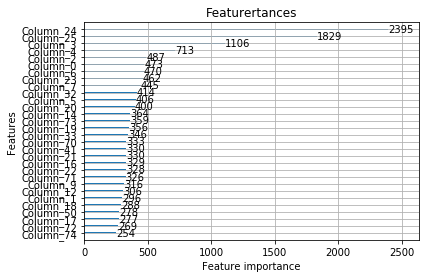

--------------------------- 保存预测文件 ---------------------


In [3]:

now_phase = 6


for phase in range(now_phase, now_phase + 1):  
    print('phase:', phase)
    """
    train_test: 训练测试点击数据
    item_hot_list: 项目热度list
    dict_label_user_item: 训练点击中用户——最后一次点击项目字典
    item_hot_dict: 项目热度字典
    time_feat：用户点击时间特征
    
    """
    click_all, test_user_set = load_click_data(phase, nrows=nrows)
    train_test, item_hot_list, dict_label_user_item, item_hot_dict, time_feat = data_generate(click_all, test_user_set)

    
    
    print('==================================== 召回 ====================================')
    
    # TODO: 增加其它召回
    if topk_recall_read:
        topk_recall = pd.read_pickle('../data/recall/topk_recall_{phase}.pkl'.format(phase=phase))
        matrix_association_rules = np.load('../data/recall/matrix_association_rules_{phase}.npy'.format(phase=phase), allow_pickle=True).item()

    else:
        topk_recall, matrix_association_rules = topk_recall_association_rules_qyxs_icf(
                                                click_all=train_test,
                                                dict_label=dict_label_user_item, 
                                                k=recall_num
                                                )
        topk_recall.to_pickle('../data/recall/topk_recall_{phase}.pkl'.format(phase=phase))
        np.save('../data/recall/matrix_association_rules_{phase}.npy'.format(phase=phase), matrix_association_rules)


    print('-------- 评测召回效果 -------------')
    hit_rate = metrics_recall(topk_recall=topk_recall, phase=phase, k=recall_num, sep=int(recall_num/10))
    print('召回TOP:{k}时, 命中百分比:{hit_rate}'.format(k=recall_num, hit_rate=hit_rate))

    
    
    print('==================================== 排序 ====================================')
    print('-------- 构建特征 ---------')
    
    dim, epochs, learning_rate = 30, 15, 0.1 # 由于内存问题，size改回30
    if embedding_feat_read:
        print('-------- sku1 sku2 sku3 sku4 sku5 user ----------')
        dict_embedding_all_ui_item = np.load('../data/embedding/dict_embedding_all_ui_item_{phase}.npy'.format(phase=phase), 
                                             allow_pickle=True).item()
        
        print('------- user1 user2 user3 user4 user5 sku -------')
        dict_embedding_all_ui_user = np.load('../data/embedding/dict_embedding_all_ui_user_{phase}.npy'.format(phase=phase), 
                                             allow_pickle=True).item()
        
        print('------- item1 item2 item3 item4 item5 -------')
        dict_embedding_item_only = np.load('../data/embedding/dict_embedding_item_only_{phase}.npy'.format(phase=phase), 
                                           allow_pickle=True).item()
        
        print('------- user1 user2 user3 user4 user5 -------')
        dict_embedding_user_only = np.load('../data/embedding/dict_embedding_user_only_{phase}.npy'.format(phase=phase), 
                                           allow_pickle=True).item()

    else:
        print('-------- sku1 sku2 sku3 sku4 sku5 user ----------')
        dict_embedding_all_ui_item = matrix_word2vec_embedding(
                                                                click_all=train_test,
                                                                flag='item',
                                                                mode='all',
                                                                dim=dim,
                                                                epochs=epochs,
                                                                learning_rate=learning_rate
                                                                )
        np.save('../data/embedding/dict_embedding_all_ui_item_{phase}.npy'.format(phase=phase),
               dict_embedding_all_ui_item)


        print('------- user1 user2 user3 user4 user5 sku -------')
        dict_embedding_all_ui_user = matrix_word2vec_embedding(
                                                                click_all=train_test,
                                                                flag='user',
                                                                mode='all',
                                                                dim=dim,
                                                                epochs=epochs,
                                                                learning_rate=learning_rate
                                                                )
        np.save('../data/embedding/dict_embedding_all_ui_user_{phase}.npy'.format(phase=phase),
               dict_embedding_all_ui_user)


        print('------- item1 item2 item3 item4 item5 -------')
        dict_embedding_item_only = matrix_word2vec_embedding(
                                                                click_all=train_test,
                                                                flag='item',
                                                                mode='only',
                                                                dim=dim,
                                                                epochs=epochs,
                                                                learning_rate=learning_rate
                                                                )
        np.save('../data/embedding/dict_embedding_item_only_{phase}.npy'.format(phase=phase),
               dict_embedding_item_only)


        print('------- user1 user2 user3 user4 user5 -------')
        dict_embedding_user_only = matrix_word2vec_embedding(
                                                                click_all=train_test,
                                                                flag='user',
                                                                mode='only',
                                                                dim=dim,
                                                                epochs=epochs,
                                                                learning_rate=learning_rate
                                                                )
        np.save('../data/embedding/dict_embedding_user_only_{phase}.npy'.format(phase=phase),
               dict_embedding_user_only)

        
    
    print('------- Interactive Embedding Feature PCA -----------')

    # dict_embedding_all_ui_item PCA
    dict_embedding = dict_embedding_all_ui_item.copy()
    dict_embedding_all_ui_item = {}
    for i in ['user', 'item']:
        tmp = pd.DataFrame(dict_embedding[i])
        pca_ = embedding_fea_pca(tmp.T, n_components=pca_n_components) # 解释
        tmp_pca = pd.DataFrame(pca_.T)
        tmp_pca.columns = tmp.columns
        dict_embedding_all_ui_item[i] = dict(tmp_pca)
    
    
    # dict_embedding_all_ui_user PCA
    dict_embedding = dict_embedding_all_ui_user.copy()
    dict_embedding_all_ui_user = {}
    for i in ['user', 'item']:
        tmp = pd.DataFrame(dict_embedding[i])
        pca_ = embedding_fea_pca(tmp.T, n_components=pca_n_components) # 解释
        tmp_pca = pd.DataFrame(pca_.T)
        tmp_pca.columns = tmp.columns
        dict_embedding_all_ui_user[i] = dict(tmp_pca)
    print('dict_embedding_all_ui_user是否降维成功........', len(dict_embedding_all_ui_user['user']['1']))    
    del tmp, tmp_pca

    
    
    print('------- user or item Embedding Feature Cluster -----------')

    # dict_embedding_item_only聚类
    item = pd.DataFrame(dict_embedding_item_only['item'])
    km_cluster = KMeans(n_clusters=item_n_clusters, max_iter=300, n_init=40, \
                        init='k-means++') #, n_jobs=-1)
    # 返回类索引
    result = km_cluster.fit_predict(item.T)
    item_cluster = pd.DataFrame({'item_id': item.columns, 'item_cluster': np.int16(result)})
    del item, km_cluster, result, dict_embedding_item_only
    
    # dict_embedding_user_only聚类
    user = pd.DataFrame(dict_embedding_user_only['user'])
    km_cluster = KMeans(n_clusters=user_n_clusters, max_iter=300, n_init=40, \
                        init='k-means++') #, n_jobs=-1)
    # 返回类索引
    result = km_cluster.fit_predict(user.T)
    user_cluster = pd.DataFrame({'user_id': user.columns, 'user_cluster': np.int16(result)})
    del user, km_cluster, result, dict_embedding_user_only
    
    
    # 加载聚类的统计特征
    user_cluster_feat_ = user_cluster_feat(click_all, user_cluster)
    item_cluster_feat_ = item_cluster_feat(click_all, item_cluster)

    del click_all, user_cluster, item_cluster
    
    
    print('------- 特征加工 -----------')

    print('..............topk_recall shape:', topk_recall.shape)

    
#     feature_all = get_train_test_data(topk_recall,
#                   matrix_association_rules, 
#                   time_feat,
#                   user_cluster_feat_,
#                   item_cluster_feat_,
#                   item_hot_dict,
#                   txt_cosine_similarity_dict,
#                   img_cosine_similarity_dict,
#                   dict_embedding_all_ui_item,
#                   dict_embedding_all_ui_user,
#                   flag_test,
#                   click_topn)


#     lprofiler = LineProfiler(get_train_test_data)
#     lprofiler.run('get_train_test_data( topk_recall[:80000], matrix_association_rules, time_feat, user_cluster_feat_, item_cluster_feat_, item_hot_dict, txt_cosine_similarity_dict, img_cosine_similarity_dict, dict_embedding_all_ui_item, dict_embedding_all_ui_user, flag_test=False, click_topn=click_topn)')
#     lprofiler.print_stats()


    # 多进程构建特征
    # 函数get_train_test_data内部已保存结果
    if __name__=='__main__':
        cpu_num = cpu_count()
        
        pool = Pool(open_cpu_n+1) # 创建一个多个进程的进程池
        feature_part = []
        # 将topk_recall分batchs_n批次，并不是越大越好，启动进程也是需时间的
        batch_size = topk_recall.shape[0]//(batchs_n)
        
        for batch in range(batchs_n):
            start_index = batch * batch_size
            if batch==cpu_num:
                end_index = topk_recall.shape[0]
            else:
                end_index = (1+batch) * batch_size
            feature_part.append(pool.apply_async(func=get_train_test_data, 
                                                 args=(topk_recall[start_index:end_index],
                                                       matrix_association_rules, 
                                                       time_feat,
                                                       user_cluster_feat_,
                                                       item_cluster_feat_,
                                                       item_hot_dict,
                                                       txt_cosine_similarity_dict,
                                                       img_cosine_similarity_dict,
                                                       dict_embedding_all_ui_item,
                                                       dict_embedding_all_ui_user,
                                                       phase,
                                                       batch,
                                                       flag_test,
                                                       click_topn)))            
        pool.close()
        pool.join() 
        
        """
        遍历result列表，取出子进程对象，访问get()方法，获取返回值。（此时所有子进程已执行完毕）
        result[0].get()
        """
        print('进程结束') 
     
    
    
#     # 释放内存
# #     del topk_recall, matrix_association_rules, txt_cosine_similarity_dict, img_cosine_similarity_dict, dict_embedding_all_ui_item, dict_embedding_all_ui_user, dict_embedding_item_only, dict_embedding_user_only
      
    print('分片特征数据拼接')
    # feature_all = Pool_feature_concat(feature_part)
    # 加载暂存的特征数据
    feature_all = load_pool_feature(phase=phase, batchs_n=batchs_n)
    # 删除暂存的特征数据
    remove_pool_feature(phase, batchs_n)


    feature_all = add_time_statistics(feature_all, time_feat)
    feature_all = add_user_statistics(feature_all, user_cluster_feat_)
    feature_all = add_item_statistics(feature_all, item_cluster_feat_)
    print('feature_all的列: ', feature_all.columns)
    
    
    # 数据量太大了，保存占用空间
    # print('特征数据保存')
    # feature_all.to_pickle("../data/process/feature_all_phase{phase}_0002.pkl".format(phase=phase))
    
    ############################## 整体数据特征 ############################## 
    print('--------------------------- 特征数据 ---------------------')
    len_f = len(feature_all)
    len_train = len(feature_all[feature_all['train_flag']=='train'])
    len_test = len(feature_all[feature_all['train_flag']=='test'])
    len_train_1 = len(feature_all[(feature_all['train_flag']=='train') & (feature_all['label']== 1)]) 
    print('所有数据条数', len_f)
    print('训练数据 : ', len_train)
    print('训练数据 label 1 : ', len_train_1)
    print('训练数据 1 / 0 rate : ', len_train_1 * 1.0 / len_f)
    print('测试数据 : ' , len_test)
    print('flag : ', set(feature_all['train_flag']))

    
    ############################## 训练模型 ############################## 
    print('--------------------------- 训练模型 ---------------------')
    submit = train_model_lgb(feature_all, recall_rate=hit_rate, hot_list=item_hot_list, valid=0.2, topk=50, 
                             num_boost_round=1500, early_stopping_rounds=500)

    
    # submit = train_model_rf(feature_all, recall_rate=hit_rate, hot_list=item_hot_list, valid=0.2, topk=50)
    

    print('--------------------------- 保存预测文件 ---------------------')
    phase_submit_save(submit, phase, 50)


In [3]:

now_phase = 4


for phase in range(now_phase, now_phase + 1):  
    print('phase:', phase)
    """
    train_test: 训练测试点击数据
    item_hot_list: 项目热度list
    dict_label_user_item: 训练点击中用户——最后一次点击项目字典
    item_hot_dict: 项目热度字典
    time_feat：用户点击时间特征
    
    """
    click_all, test_user_set = load_click_data(phase, nrows=nrows)
    train_test, item_hot_list, dict_label_user_item, item_hot_dict, time_feat = data_generate(click_all, test_user_set)

    
    
    print('==================================== 召回 ====================================')
    
    # TODO: 增加其它召回
    if topk_recall_read:
        topk_recall = pd.read_pickle('../data/recall/topk_recall_{phase}.pkl'.format(phase=phase))
        matrix_association_rules = np.load('../data/recall/matrix_association_rules_{phase}.npy'.format(phase=phase), allow_pickle=True).item()

    else:
        topk_recall, matrix_association_rules = topk_recall_association_rules_qyxs_icf(
                                                click_all=train_test,
                                                dict_label=dict_label_user_item, 
                                                k=recall_num
                                                )
        topk_recall.to_pickle('../data/recall/topk_recall_{phase}.pkl'.format(phase=phase))
        np.save('../data/recall/matrix_association_rules_{phase}.npy'.format(phase=phase), matrix_association_rules)


    print('-------- 评测召回效果 -------------')
    hit_rate = metrics_recall(topk_recall=topk_recall, phase=phase, k=recall_num, sep=int(recall_num/10))
    print('召回TOP:{k}时, 命中百分比:{hit_rate}'.format(k=recall_num, hit_rate=hit_rate))

    
    
    print('==================================== 排序 ====================================')
    print('-------- 构建特征 ---------')
    
    dim, epochs, learning_rate = 30, 15, 0.1 # 由于内存问题，size改回30
    if embedding_feat_read:
        print('-------- sku1 sku2 sku3 sku4 sku5 user ----------')
        dict_embedding_all_ui_item = np.load('../data/embedding/dict_embedding_all_ui_item_{phase}.npy'.format(phase=phase), 
                                             allow_pickle=True).item()
        
        print('------- user1 user2 user3 user4 user5 sku -------')
        dict_embedding_all_ui_user = np.load('../data/embedding/dict_embedding_all_ui_user_{phase}.npy'.format(phase=phase), 
                                             allow_pickle=True).item()
        
        print('------- item1 item2 item3 item4 item5 -------')
        dict_embedding_item_only = np.load('../data/embedding/dict_embedding_item_only_{phase}.npy'.format(phase=phase), 
                                           allow_pickle=True).item()
        
        print('------- user1 user2 user3 user4 user5 -------')
        dict_embedding_user_only = np.load('../data/embedding/dict_embedding_user_only_{phase}.npy'.format(phase=phase), 
                                           allow_pickle=True).item()

    else:
        print('-------- sku1 sku2 sku3 sku4 sku5 user ----------')
        dict_embedding_all_ui_item = matrix_word2vec_embedding(
                                                                click_all=train_test,
                                                                flag='item',
                                                                mode='all',
                                                                dim=dim,
                                                                epochs=epochs,
                                                                learning_rate=learning_rate
                                                                )
        np.save('../data/embedding/dict_embedding_all_ui_item_{phase}.npy'.format(phase=phase),
               dict_embedding_all_ui_item)


        print('------- user1 user2 user3 user4 user5 sku -------')
        dict_embedding_all_ui_user = matrix_word2vec_embedding(
                                                                click_all=train_test,
                                                                flag='user',
                                                                mode='all',
                                                                dim=dim,
                                                                epochs=epochs,
                                                                learning_rate=learning_rate
                                                                )
        np.save('../data/embedding/dict_embedding_all_ui_user_{phase}.npy'.format(phase=phase),
               dict_embedding_all_ui_user)


        print('------- item1 item2 item3 item4 item5 -------')
        dict_embedding_item_only = matrix_word2vec_embedding(
                                                                click_all=train_test,
                                                                flag='item',
                                                                mode='only',
                                                                dim=dim,
                                                                epochs=epochs,
                                                                learning_rate=learning_rate
                                                                )
        np.save('../data/embedding/dict_embedding_item_only_{phase}.npy'.format(phase=phase),
               dict_embedding_item_only)


        print('------- user1 user2 user3 user4 user5 -------')
        dict_embedding_user_only = matrix_word2vec_embedding(
                                                                click_all=train_test,
                                                                flag='user',
                                                                mode='only',
                                                                dim=dim,
                                                                epochs=epochs,
                                                                learning_rate=learning_rate
                                                                )
        np.save('../data/embedding/dict_embedding_user_only_{phase}.npy'.format(phase=phase),
               dict_embedding_user_only)

        
    
    print('------- Interactive Embedding Feature PCA -----------')

    # dict_embedding_all_ui_item PCA
    dict_embedding = dict_embedding_all_ui_item.copy()
    dict_embedding_all_ui_item = {}
    for i in ['user', 'item']:
        tmp = pd.DataFrame(dict_embedding[i])
        pca_ = embedding_fea_pca(tmp.T, n_components=pca_n_components) # 解释
        tmp_pca = pd.DataFrame(pca_.T)
        tmp_pca.columns = tmp.columns
        dict_embedding_all_ui_item[i] = dict(tmp_pca)
    
    
    # dict_embedding_all_ui_user PCA
    dict_embedding = dict_embedding_all_ui_user.copy()
    dict_embedding_all_ui_user = {}
    for i in ['user', 'item']:
        tmp = pd.DataFrame(dict_embedding[i])
        pca_ = embedding_fea_pca(tmp.T, n_components=pca_n_components) # 解释
        tmp_pca = pd.DataFrame(pca_.T)
        tmp_pca.columns = tmp.columns
        dict_embedding_all_ui_user[i] = dict(tmp_pca)
    print('dict_embedding_all_ui_user是否降维成功........', len(dict_embedding_all_ui_user['user']['1']))    
    del tmp, tmp_pca

    
    
    print('------- user or item Embedding Feature Cluster -----------')

    # dict_embedding_item_only聚类
    item = pd.DataFrame(dict_embedding_item_only['item'])
    km_cluster = KMeans(n_clusters=item_n_clusters, max_iter=300, n_init=40, \
                        init='k-means++') #, n_jobs=-1)
    # 返回类索引
    result = km_cluster.fit_predict(item.T)
    item_cluster = pd.DataFrame({'item_id': item.columns, 'item_cluster': np.int16(result)})
    del item, km_cluster, result, dict_embedding_item_only
    
    # dict_embedding_user_only聚类
    user = pd.DataFrame(dict_embedding_user_only['user'])
    km_cluster = KMeans(n_clusters=user_n_clusters, max_iter=300, n_init=40, \
                        init='k-means++') #, n_jobs=-1)
    # 返回类索引
    result = km_cluster.fit_predict(user.T)
    user_cluster = pd.DataFrame({'user_id': user.columns, 'user_cluster': np.int16(result)})
    del user, km_cluster, result, dict_embedding_user_only
    
    
    # 加载聚类的统计特征
    user_cluster_feat_ = user_cluster_feat(click_all, user_cluster)
    item_cluster_feat_ = item_cluster_feat(click_all, item_cluster)

    del click_all, user_cluster, item_cluster
    
    
    print('------- 特征加工 -----------')

    print('..............topk_recall shape:', topk_recall.shape)

    
#     feature_all = get_train_test_data(topk_recall,
#                   matrix_association_rules, 
#                   time_feat,
#                   user_cluster_feat_,
#                   item_cluster_feat_,
#                   item_hot_dict,
#                   txt_cosine_similarity_dict,
#                   img_cosine_similarity_dict,
#                   dict_embedding_all_ui_item,
#                   dict_embedding_all_ui_user,
#                   flag_test,
#                   click_topn)


#     lprofiler = LineProfiler(get_train_test_data)
#     lprofiler.run('get_train_test_data( topk_recall[:80000], matrix_association_rules, time_feat, user_cluster_feat_, item_cluster_feat_, item_hot_dict, txt_cosine_similarity_dict, img_cosine_similarity_dict, dict_embedding_all_ui_item, dict_embedding_all_ui_user, flag_test=False, click_topn=click_topn)')
#     lprofiler.print_stats()


    # 多进程构建特征
    if __name__=='__main__':
        cpu_num = cpu_count()
        batchs_n = 5 # 数据划分份数
        pool = Pool(batchs_n+1) # 创建一个多个进程的进程池
        feature_part = []
        # 将topk_recall分batchs_n批次，并不是越大越好，启动进程也是需时间的
        batch_size = topk_recall.shape[0]//(batchs_n)
        
        for batch in range(batchs_n):
            start_index = batch * batch_size
            if batch==cpu_num:
                end_index = topk_recall.shape[0]
            else:
                end_index = (1+batch) * batch_size
            feature_part.append(pool.apply_async(func=get_train_test_data, 
                                                 args=(topk_recall[start_index:end_index],
                                                       matrix_association_rules, 
                                                       time_feat,
                                                       user_cluster_feat_,
                                                       item_cluster_feat_,
                                                       item_hot_dict,
                                                       txt_cosine_similarity_dict,
                                                       img_cosine_similarity_dict,
                                                       dict_embedding_all_ui_item,
                                                       dict_embedding_all_ui_user,
                                                       phase,
                                                       batch,
                                                       flag_test,
                                                       click_topn)))            
        pool.close()
        pool.join() 
        
        """
        遍历result列表，取出子进程对象，访问get()方法，获取返回值。（此时所有子进程已执行完毕）
        result[0].get()
        """
        print('进程结束') 
     
    
    
#     # 释放内存
# #     del topk_recall, matrix_association_rules, txt_cosine_similarity_dict, img_cosine_similarity_dict, dict_embedding_all_ui_item, dict_embedding_all_ui_user, dict_embedding_item_only, dict_embedding_user_only
      
    print('分片特征数据拼接')
    #feature_all = Pool_feature_concat(feature_part)
    feature_all = load_pool_feature(phase=phase, batchs_n=batchs_n)
    print('feature_all的列: ', feature_all.columns)
    print(feature_all.head(2))


    feature_all = add_time_statistics(feature_all, time_feat)
    feature_all = add_user_statistics(feature_all, user_cluster_feat_)
    feature_all = add_item_statistics(feature_all, item_cluster_feat_)
    

    # print('特征数据保存')
    # feature_all.to_pickle("../data/process/feature_all_phase{phase}_0002.pkl".format(phase=phase))
    
    ############################## 整体数据特征 ############################## 
    print('--------------------------- 特征数据 ---------------------')
    len_f = len(feature_all)
    len_train = len(feature_all[feature_all['train_flag']=='train'])
    len_test = len(feature_all[feature_all['train_flag']=='test'])
    len_train_1 = len(feature_all[(feature_all['train_flag']=='train') & (feature_all['label']== 1)]) 
    print('所有数据条数', len_f)
    print('训练数据 : ', len_train)
    print('训练数据 label 1 : ', len_train_1)
    print('训练数据 1 / 0 rate : ', len_train_1 * 1.0 / len_f)
    print('测试数据 : ' , len_test)
    print('flag : ', set(feature_all['train_flag']))

    
    ############################## 训练模型 ############################## 
    print('--------------------------- 训练模型 ---------------------')
    submit = train_model_lgb(feature_all, recall_rate=hit_rate, hot_list=item_hot_list, valid=0.2, topk=50, 
                             num_boost_round=1500, early_stopping_rounds=500)

    
    # submit = train_model_rf(feature_all, recall_rate=hit_rate, hot_list=item_hot_list, valid=0.2, topk=50)
    

    print('--------------------------- 保存预测文件 ---------------------')
    phase_submit_save(submit, phase, 50)


phase: 4
================================== 加载click数据 ==================================
================================== 生成中间数据 ==================================
==================================== 召回 ====================================
-------- 评测召回效果 -------------
-------- 召回效果 -------------
--------:phase:  4  -------------
phase:  4  top_ 0  :  hit_num :  320 hit_rate :  0.018923713778829097  data_num :  16910

phase:  4  top_ 70  :  hit_num :  2492 hit_rate :  0.14736842105263157  data_num :  16910

phase:  4  top_ 140  :  hit_num :  3092 hit_rate :  0.18285038438793613  data_num :  16910

phase:  4  top_ 210  :  hit_num :  3402 hit_rate :  0.20118273211117682  data_num :  16910

phase:  4  top_ 280  :  hit_num :  3660 hit_rate :  0.21643997634535778  data_num :  16910

phase:  4  top_ 350  :  hit_num :  3825 hit_rate :  0.22619751626256654  data_num :  16910

phase:  4  top_ 420  :  hit_num :  3985 hit_rate :  0.23565937315198107  data_num :  16910

phase:  4  top_ 490  :  

23521it [00:29, 801.28it/s]

------- 构建样本 -----------


25787it [00:32, 740.43it/s]

............... train len= 579600


25863it [00:32, 713.17it/s]

............... test  len= 250600


26106it [00:32, 771.06it/s]

----------- 加入特征 train -----------


24375it [00:30, 780.12it/s]

------- 构建样本 -----------


52981it [01:06, 792.32it/s]

............... train len= 623700
............... test  len= 231700


53301it [01:06, 794.86it/s]

----------- 加入特征 train -----------


76711it [01:38, 642.97it/s]

------- 构建样本 -----------


52351it [01:09, 655.47it/s]

............... train len= 565600
............... test  len= 233100


52652it [01:09, 721.92it/s]

----------- 加入特征 train -----------


20392it [00:34, 530.15it/s]]

------- 构建样本 -----------


76500it [01:48, 500.42it/s]]

............... train len= 674800
............... test  len= 238700


49999it [01:14, 565.34it/s]]

----------- 加入特征 train -----------


579600it [15:38, 617.79it/s]
564538it [15:24, 611.60it/s]

----------- 加入特征 test -----------


619920it [16:34, 623.26it/s]
535444it [14:35, 606.51it/s]

----------- 加入特征 test -----------


565600it [15:29, 608.71it/s]
556494it [15:10, 672.78it/s]

----------- 加入特征 test -----------


623700it [16:59, 611.67it/s]
69888it [01:55, 638.87it/s]]

----------- 加入特征 test -----------


674800it [18:21, 612.45it/s]
134218it [03:36, 721.69it/s]

----------- 加入特征 test -----------


250600it [06:52, 606.81it/s]
241500it [06:39, 604.78it/s]
233100it [06:19, 614.60it/s]
231700it [06:07, 629.99it/s]
238700it [05:37, 707.72it/s]


进程结束
分片特征数据拼接
feature_all的列:  Index(['similarity_d1', 'similarity_d2', 'score_similar', 'dim1_user_0',
       'dim1_user_1', 'dim1_user_2', 'dim1_user_3', 'dim1_user_4',
       'dim1_item_0', 'dim1_item_1', 'dim1_item_2', 'dim1_item_3',
       'dim1_item_4', 'dim2_user_0', 'dim2_user_1', 'dim2_user_2',
       'dim2_user_3', 'dim2_user_4', 'dim2_item_0', 'dim2_item_1',
       'dim2_item_2', 'dim2_item_3', 'dim2_item_4', 'clicked_item_0',
       'clicked_item_0_cnt', 'clicked_item_0_to_item_0_score',
       'item_0_to_clicked_item_0_txt_cosine_sim',
       'item_0_to_clicked_item_0_img_cosine_sim',
       'clicked_item_0_item_cluster', 'clicked_item_0_item_cluster_cnt',
       'clicked_item_0_item_cluster_user_cnt',
       'clicked_item_0_item_cluster_item_cnt', 'clicked_item_1',
       'clicked_item_1_cnt', 'clicked_item_1_to_item_1_score',
       'item_1_to_clicked_item_1_txt_cosine_sim',
       'item_1_to_clicked_item_1_img_cosine_sim',
       'clicked_item_1_item_cluster', 'clicked_i

OSError: [Errno 28] No space left on device

--------------------------- 特征数据 ---------------------
所有数据条数 4259220
训练数据 :  3063620
训练数据 label 1 :  4377
训练数据 1 / 0 rate :  0.0010276529505402398
测试数据 :  1195600
flag :  {'test', 'train'}
--------------------------- 训练模型 ---------------------
[50]	valid_0's ndcg@1: 0.987436	valid_0's ndcg@2: 0.991777	valid_0's ndcg@3: 0.993237	valid_0's ndcg@4: 0.993511	valid_0's ndcg@5: 0.993511
[100]	valid_0's ndcg@1: 0.98715	valid_0's ndcg@2: 0.991741	valid_0's ndcg@3: 0.993091	valid_0's ndcg@4: 0.993412	valid_0's ndcg@5: 0.993412
[150]	valid_0's ndcg@1: 0.988578	valid_0's ndcg@2: 0.992588	valid_0's ndcg@3: 0.994112	valid_0's ndcg@4: 0.994386	valid_0's ndcg@5: 0.994564
[200]	valid_0's ndcg@1: 0.98715	valid_0's ndcg@2: 0.992752	valid_0's ndcg@3: 0.994102	valid_0's ndcg@4: 0.994451	valid_0's ndcg@5: 0.994562
[250]	valid_0's ndcg@1: 0.986579	valid_0's ndcg@2: 0.992472	valid_0's ndcg@3: 0.993909	valid_0's ndcg@4: 0.994258	valid_0's ndcg@5: 0.994369
[300]	valid_0's ndcg@1: 0.986865	valid_0's ndcg@2: 0.

<Figure size 1080x720 with 0 Axes>

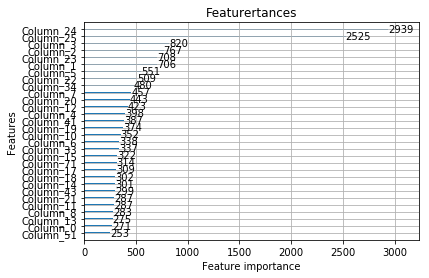

--------------------------- 保存预测文件 ---------------------


OSError: [Errno 28] No space left on device

In [6]:
    ############################## 整体数据特征 ############################## 
    print('--------------------------- 特征数据 ---------------------')
    len_f = len(feature_all)
    len_train = len(feature_all[feature_all['train_flag']=='train'])
    len_test = len(feature_all[feature_all['train_flag']=='test'])
    len_train_1 = len(feature_all[(feature_all['train_flag']=='train') & (feature_all['label']== 1)]) 
    print('所有数据条数', len_f)
    print('训练数据 : ', len_train)
    print('训练数据 label 1 : ', len_train_1)
    print('训练数据 1 / 0 rate : ', len_train_1 * 1.0 / len_f)
    print('测试数据 : ' , len_test)
    print('flag : ', set(feature_all['train_flag']))

    
    ############################## 训练模型 ############################## 
    print('--------------------------- 训练模型 ---------------------')
    submit = train_model_lgb(feature_all, recall_rate=hit_rate, hot_list=item_hot_list, valid=0.2, topk=50, 
                             num_boost_round=1500, early_stopping_rounds=500)

    
    # submit = train_model_rf(feature_all, recall_rate=hit_rate, hot_list=item_hot_list, valid=0.2, topk=50)
    

    print('--------------------------- 保存预测文件 ---------------------')
    phase_submit_save(submit, phase, 50)

phase: 2
================================== 加载click数据 ==================================
================================== 生成中间数据 ==================================
==================================== 召回 ====================================


21it [00:00, 206.18it/s]

------- association rules matrix 生成 ---------


18398it [01:04, 283.64it/s]
13it [00:00, 119.49it/s]

------- association rules 召回 ---------


18398it [02:46, 110.73it/s]


-------- 评测召回效果 -------------
-------- 召回效果 -------------
--------:phase:  2  -------------
phase:  2  top_ 0  :  hit_num :  328 hit_rate :  0.019631314340435718  data_num :  16708

phase:  2  top_ 70  :  hit_num :  2412 hit_rate :  0.14436198228393585  data_num :  16708

phase:  2  top_ 140  :  hit_num :  2947 hit_rate :  0.17638257122336606  data_num :  16708

phase:  2  top_ 210  :  hit_num :  3233 hit_rate :  0.19350011970313621  data_num :  16708

phase:  2  top_ 280  :  hit_num :  3445 hit_rate :  0.20618865214268614  data_num :  16708

phase:  2  top_ 350  :  hit_num :  3607 hit_rate :  0.21588460617668184  data_num :  16708

phase:  2  top_ 420  :  hit_num :  3756 hit_rate :  0.22480248982523343  data_num :  16708

phase:  2  top_ 490  :  hit_num :  3878 hit_rate :  0.23210438113478574  data_num :  16708

phase:  2  top_ 560  :  hit_num :  3971 hit_rate :  0.2376705769691166  data_num :  16708

phase:  2  top_ 630  :  hit_num :  4069 hit_rate :  0.24353603064400287  data_num : 

20896it [00:26, 803.71it/s]

------- 构建样本 -----------


23235it [00:29, 792.89it/s]

............... train len= 576800
............... test  len= 239400


23556it [00:29, 796.65it/s]

----------- 加入特征 train -----------


20730it [00:26, 786.06it/s]

------- 构建样本 -----------


22893it [00:29, 735.34it/s]

............... train len= 572600
............... test  len= 239400


23299it [00:29, 793.83it/s]

----------- 加入特征 train -----------


66077it [01:26, 472.78it/s]

------- 构建样本 -----------


43925it [00:59, 649.79it/s]

............... train len= 564900
............... test  len= 236600


44299it [01:00, 680.84it/s]

----------- 加入特征 train -----------


18210it [00:31, 768.66it/s]

------- 构建样本 -----------


88881it [02:05, 526.75it/s]

............... train len= 607600
............... test  len= 244300


21065it [00:35, 724.46it/s]

----------- 加入特征 train -----------


590100it [15:59, 615.01it/s]
576800it [15:47, 608.76it/s]
515109it [14:13, 649.41it/s]

----------- 加入特征 test -----------


526228it [14:32, 608.58it/s]

----------- 加入特征 test -----------


572600it [15:54, 600.04it/s]
547075it [15:06, 609.96it/s]

----------- 加入特征 test -----------


564900it [15:43, 598.69it/s]
558678it [15:26, 710.10it/s]

----------- 加入特征 test -----------


607600it [16:48, 602.19it/s]
61591it [01:43, 478.41it/s]]

----------- 加入特征 test -----------


223300it [06:06, 609.92it/s]
239400it [06:27, 617.21it/s]
239400it [06:24, 622.80it/s]
236600it [06:18, 624.61it/s]
244300it [05:59, 678.70it/s]


进程结束
分片特征数据拼接
------ part=0
------ part=1
------ part=2
------ part=3
------ part=4
feature_all的列:  Index(['similarity_d1', 'similarity_d2', 'score_similar', 'dim1_user_0',
       'dim1_user_1', 'dim1_user_2', 'dim1_user_3', 'dim1_user_4',
       'dim1_item_0', 'dim1_item_1', 'dim1_item_2', 'dim1_item_3',
       'dim1_item_4', 'dim2_user_0', 'dim2_user_1', 'dim2_user_2',
       'dim2_user_3', 'dim2_user_4', 'dim2_item_0', 'dim2_item_1',
       'dim2_item_2', 'dim2_item_3', 'dim2_item_4', 'clicked_item_0',
       'clicked_item_0_cnt', 'clicked_item_0_to_item_0_score',
       'item_0_to_clicked_item_0_txt_cosine_sim',
       'item_0_to_clicked_item_0_img_cosine_sim',
       'clicked_item_0_item_cluster', 'clicked_item_0_item_cluster_cnt',
       'clicked_item_0_item_cluster_user_cnt',
       'clicked_item_0_item_cluster_item_cnt', 'clicked_item_1',
       'clicked_item_1_cnt', 'clicked_item_1_to_item_1_score',
       'item_1_to_clicked_item_1_txt_cosine_sim',
       'item_1_to_clicked_it

------------- assert -------------
LGBM的特征重要性...


<Figure size 1080x720 with 0 Axes>

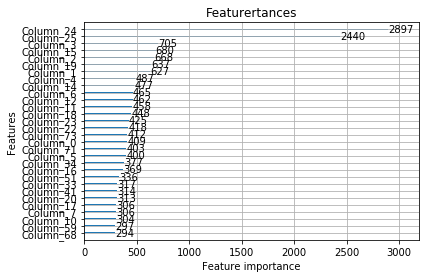

--------------------------- 保存预测文件 ---------------------


In [3]:

now_phase = 2


for phase in range(now_phase, now_phase + 1):  
    print('phase:', phase)
    """
    train_test: 训练测试点击数据
    item_hot_list: 项目热度list
    dict_label_user_item: 训练点击中用户——最后一次点击项目字典
    item_hot_dict: 项目热度字典
    time_feat：用户点击时间特征
    
    """
    click_all, test_user_set = load_click_data(phase, nrows=nrows)
    train_test, item_hot_list, dict_label_user_item, item_hot_dict, time_feat = data_generate(click_all, test_user_set)

    
    
    print('==================================== 召回 ====================================')
    
    # TODO: 增加其它召回
    if topk_recall_read:
        topk_recall = pd.read_pickle('../data/recall/topk_recall_{phase}.pkl'.format(phase=phase))
        matrix_association_rules = np.load('../data/recall/matrix_association_rules_{phase}.npy'.format(phase=phase), allow_pickle=True).item()

    else:
        topk_recall, matrix_association_rules = topk_recall_association_rules_qyxs_icf(
                                                click_all=train_test,
                                                dict_label=dict_label_user_item, 
                                                k=recall_num
                                                )
        topk_recall.to_pickle('../data/recall/topk_recall_{phase}.pkl'.format(phase=phase))
        np.save('../data/recall/matrix_association_rules_{phase}.npy'.format(phase=phase), matrix_association_rules)


    print('-------- 评测召回效果 -------------')
    hit_rate = metrics_recall(topk_recall=topk_recall, phase=phase, k=recall_num, sep=int(recall_num/10))
    print('召回TOP:{k}时, 命中百分比:{hit_rate}'.format(k=recall_num, hit_rate=hit_rate))

    
    
    print('==================================== 排序 ====================================')
    print('-------- 构建特征 ---------')
    
    dim, epochs, learning_rate = 30, 15, 0.1 # 由于内存问题，size改回30
    if embedding_feat_read:
        print('-------- sku1 sku2 sku3 sku4 sku5 user ----------')
        dict_embedding_all_ui_item = np.load('../data/embedding/dict_embedding_all_ui_item_{phase}.npy'.format(phase=phase), 
                                             allow_pickle=True).item()
        
        print('------- user1 user2 user3 user4 user5 sku -------')
        dict_embedding_all_ui_user = np.load('../data/embedding/dict_embedding_all_ui_user_{phase}.npy'.format(phase=phase), 
                                             allow_pickle=True).item()
        
        print('------- item1 item2 item3 item4 item5 -------')
        dict_embedding_item_only = np.load('../data/embedding/dict_embedding_item_only_{phase}.npy'.format(phase=phase), 
                                           allow_pickle=True).item()
        
        print('------- user1 user2 user3 user4 user5 -------')
        dict_embedding_user_only = np.load('../data/embedding/dict_embedding_user_only_{phase}.npy'.format(phase=phase), 
                                           allow_pickle=True).item()

    else:
        print('-------- sku1 sku2 sku3 sku4 sku5 user ----------')
        dict_embedding_all_ui_item = matrix_word2vec_embedding(
                                                                click_all=train_test,
                                                                flag='item',
                                                                mode='all',
                                                                dim=dim,
                                                                epochs=epochs,
                                                                learning_rate=learning_rate
                                                                )
        np.save('../data/embedding/dict_embedding_all_ui_item_{phase}.npy'.format(phase=phase),
               dict_embedding_all_ui_item)


        print('------- user1 user2 user3 user4 user5 sku -------')
        dict_embedding_all_ui_user = matrix_word2vec_embedding(
                                                                click_all=train_test,
                                                                flag='user',
                                                                mode='all',
                                                                dim=dim,
                                                                epochs=epochs,
                                                                learning_rate=learning_rate
                                                                )
        np.save('../data/embedding/dict_embedding_all_ui_user_{phase}.npy'.format(phase=phase),
               dict_embedding_all_ui_user)


        print('------- item1 item2 item3 item4 item5 -------')
        dict_embedding_item_only = matrix_word2vec_embedding(
                                                                click_all=train_test,
                                                                flag='item',
                                                                mode='only',
                                                                dim=dim,
                                                                epochs=epochs,
                                                                learning_rate=learning_rate
                                                                )
        np.save('../data/embedding/dict_embedding_item_only_{phase}.npy'.format(phase=phase),
               dict_embedding_item_only)


        print('------- user1 user2 user3 user4 user5 -------')
        dict_embedding_user_only = matrix_word2vec_embedding(
                                                                click_all=train_test,
                                                                flag='user',
                                                                mode='only',
                                                                dim=dim,
                                                                epochs=epochs,
                                                                learning_rate=learning_rate
                                                                )
        np.save('../data/embedding/dict_embedding_user_only_{phase}.npy'.format(phase=phase),
               dict_embedding_user_only)

        
    
    print('------- Interactive Embedding Feature PCA -----------')

    # dict_embedding_all_ui_item PCA
    dict_embedding = dict_embedding_all_ui_item.copy()
    dict_embedding_all_ui_item = {}
    for i in ['user', 'item']:
        tmp = pd.DataFrame(dict_embedding[i])
        pca_ = embedding_fea_pca(tmp.T, n_components=pca_n_components) # 解释
        tmp_pca = pd.DataFrame(pca_.T)
        tmp_pca.columns = tmp.columns
        dict_embedding_all_ui_item[i] = dict(tmp_pca)
    
    
    # dict_embedding_all_ui_user PCA
    dict_embedding = dict_embedding_all_ui_user.copy()
    dict_embedding_all_ui_user = {}
    for i in ['user', 'item']:
        tmp = pd.DataFrame(dict_embedding[i])
        pca_ = embedding_fea_pca(tmp.T, n_components=pca_n_components) # 解释
        tmp_pca = pd.DataFrame(pca_.T)
        tmp_pca.columns = tmp.columns
        dict_embedding_all_ui_user[i] = dict(tmp_pca)
    print('dict_embedding_all_ui_user是否降维成功........', len(dict_embedding_all_ui_user['user']['1']))    
    del tmp, tmp_pca

    
    
    print('------- user or item Embedding Feature Cluster -----------')

    # dict_embedding_item_only聚类
    item = pd.DataFrame(dict_embedding_item_only['item'])
    km_cluster = KMeans(n_clusters=item_n_clusters, max_iter=300, n_init=40, \
                        init='k-means++') #, n_jobs=-1)
    # 返回类索引
    result = km_cluster.fit_predict(item.T)
    item_cluster = pd.DataFrame({'item_id': item.columns, 'item_cluster': np.int16(result)})
    del item, km_cluster, result, dict_embedding_item_only
    
    # dict_embedding_user_only聚类
    user = pd.DataFrame(dict_embedding_user_only['user'])
    km_cluster = KMeans(n_clusters=user_n_clusters, max_iter=300, n_init=40, \
                        init='k-means++') #, n_jobs=-1)
    # 返回类索引
    result = km_cluster.fit_predict(user.T)
    user_cluster = pd.DataFrame({'user_id': user.columns, 'user_cluster': np.int16(result)})
    del user, km_cluster, result, dict_embedding_user_only
    
    
    # 加载聚类的统计特征
    user_cluster_feat_ = user_cluster_feat(click_all, user_cluster)
    item_cluster_feat_ = item_cluster_feat(click_all, item_cluster)

    del click_all, user_cluster, item_cluster
    
    
    print('------- 特征加工 -----------')

    print('..............topk_recall shape:', topk_recall.shape)

    
#     feature_all = get_train_test_data(topk_recall,
#                   matrix_association_rules, 
#                   time_feat,
#                   user_cluster_feat_,
#                   item_cluster_feat_,
#                   item_hot_dict,
#                   txt_cosine_similarity_dict,
#                   img_cosine_similarity_dict,
#                   dict_embedding_all_ui_item,
#                   dict_embedding_all_ui_user,
#                   flag_test,
#                   click_topn)


#     lprofiler = LineProfiler(get_train_test_data)
#     lprofiler.run('get_train_test_data( topk_recall[:80000], matrix_association_rules, time_feat, user_cluster_feat_, item_cluster_feat_, item_hot_dict, txt_cosine_similarity_dict, img_cosine_similarity_dict, dict_embedding_all_ui_item, dict_embedding_all_ui_user, flag_test=False, click_topn=click_topn)')
#     lprofiler.print_stats()


    # 多进程构建特征
    if __name__=='__main__':
        cpu_num = cpu_count()
        pool = Pool(5+1) # 创建一个多个进程的进程池
        feature_part = []
        # 将topk_recall分5批次，并不是越大越好，启动进程也是需时间的
        batch_size = topk_recall.shape[0]//(5)
        
        for batch in range(5):
            start_index = batch * batch_size
            if batch==cpu_num:
                end_index = topk_recall.shape[0]
            else:
                end_index = (1+batch) * batch_size
            feature_part.append(pool.apply_async(func=get_train_test_data, 
                                                 args=(topk_recall[start_index:end_index],
                                                       matrix_association_rules, 
                                                       time_feat,
                                                       user_cluster_feat_,
                                                       item_cluster_feat_,
                                                       item_hot_dict,
                                                       txt_cosine_similarity_dict,
                                                       img_cosine_similarity_dict,
                                                       dict_embedding_all_ui_item,
                                                       dict_embedding_all_ui_user,
                                                       phase,
                                                       batch,
                                                       flag_test,
                                                       click_topn)))            
        pool.close()
        pool.join() 
        
        """
        遍历result列表，取出子进程对象，访问get()方法，获取返回值。（此时所有子进程已执行完毕）
        result[0].get()
        """
        print('进程结束') 
     
    
    
#     # 释放内存
# #     del topk_recall, matrix_association_rules, txt_cosine_similarity_dict, img_cosine_similarity_dict, dict_embedding_all_ui_item, dict_embedding_all_ui_user, dict_embedding_item_only, dict_embedding_user_only
      
    print('分片特征数据拼接')
    feature_all = Pool_feature_concat(feature_part)
    print('feature_all的列: ', feature_all.columns)
    print(feature_all.head(2))


    feature_all = add_time_statistics(feature_all, time_feat)
    feature_all = add_user_statistics(feature_all, user_cluster_feat_)
    feature_all = add_item_statistics(feature_all, item_cluster_feat_)
    

    print('特征数据保存')
    feature_all.to_pickle("../data/process/feature_all_phase{phase}_0002.pkl".format(phase=phase))
    
    ############################## 整体数据特征 ############################## 
    print('--------------------------- 特征数据 ---------------------')
    len_f = len(feature_all)
    len_train = len(feature_all[feature_all['train_flag']=='train'])
    len_test = len(feature_all[feature_all['train_flag']=='test'])
    len_train_1 = len(feature_all[(feature_all['train_flag']=='train') & (feature_all['label']== 1)]) 
    print('所有数据条数', len_f)
    print('训练数据 : ', len_train)
    print('训练数据 label 1 : ', len_train_1)
    print('训练数据 1 / 0 rate : ', len_train_1 * 1.0 / len_f)
    print('测试数据 : ' , len_test)
    print('flag : ', set(feature_all['train_flag']))

    
    ############################## 训练模型 ############################## 
    print('--------------------------- 训练模型 ---------------------')
    submit = train_model_lgb(feature_all, recall_rate=hit_rate, hot_list=item_hot_list, valid=0.2, topk=50, 
                             num_boost_round=1500, early_stopping_rounds=500)

    
    # submit = train_model_rf(feature_all, recall_rate=hit_rate, hot_list=item_hot_list, valid=0.2, topk=50)
    

    print('--------------------------- 保存预测文件 ---------------------')
    phase_submit_save(submit, phase, 50)


phase: 0
================================== 加载click数据 ==================================
================================== 生成中间数据 ==================================
==================================== 召回 ====================================


28it [00:00, 271.96it/s]

------- association rules matrix 生成 ---------


18505it [01:02, 295.95it/s]
14it [00:00, 127.43it/s]

------- association rules 召回 ---------


18505it [02:37, 117.57it/s]


-------- 评测召回效果 -------------
-------- 召回效果 -------------
--------:phase:  0  -------------
phase:  0  top_ 0  :  hit_num :  318 hit_rate :  0.018881368008550052  data_num :  16842

phase:  0  top_ 70  :  hit_num :  2344 hit_rate :  0.13917586984918656  data_num :  16842

phase:  0  top_ 140  :  hit_num :  2828 hit_rate :  0.16791354945968412  data_num :  16842

phase:  0  top_ 210  :  hit_num :  3076 hit_rate :  0.18263864149150932  data_num :  16842

phase:  0  top_ 280  :  hit_num :  3267 hit_rate :  0.19397933737085857  data_num :  16842

phase:  0  top_ 350  :  hit_num :  3432 hit_rate :  0.20377627360171002  data_num :  16842

phase:  0  top_ 420  :  hit_num :  3572 hit_rate :  0.21208882555515973  data_num :  16842

phase:  0  top_ 490  :  hit_num :  3703 hit_rate :  0.2198669991687448  data_num :  16842

phase:  0  top_ 560  :  hit_num :  3812 hit_rate :  0.22633891461821637  data_num :  16842

phase:  0  top_ 630  :  hit_num :  3921 hit_rate :  0.23281083006768793  data_num : 

18968it [00:24, 792.88it/s]

------- 构建样本 -----------


21269it [00:26, 791.01it/s]

............... train len= 524300
............... test  len= 229600


21587it [00:27, 788.93it/s]

----------- 加入特征 train -----------


40456it [00:51, 792.76it/s]

------- 构建样本 -----------


21169it [00:27, 685.42it/s]

............... train len= 570500
............... test  len= 220500


21481it [00:27, 755.47it/s]

----------- 加入特征 train -----------


61789it [01:21, 521.72it/s]

------- 构建样本 -----------


42612it [00:57, 605.51it/s]

............... train len= 520800
............... test  len= 233100


42968it [00:58, 533.57it/s]

----------- 加入特征 train -----------


37629it [00:57, 497.09it/s]

------- 构建样本 -----------


39344it [01:00, 515.34it/s]

............... train len= 590800
............... test  len= 237300


17655it [00:30, 569.53it/s]

----------- 加入特征 train -----------


524300it [14:35, 598.74it/s]
492346it [13:57, 758.53it/s]

----------- 加入特征 test -----------


588700it [16:09, 607.44it/s]
520800it [14:44, 589.08it/s]
40136it [01:07, 656.88it/s]]

----------- 加入特征 test -----------


524390it [14:37, 463.58it/s]

----------- 加入特征 test -----------


570500it [16:05, 590.72it/s]
30228it [00:48, 490.23it/s]]

----------- 加入特征 test -----------


590800it [16:31, 595.85it/s]
83551it [02:17, 553.78it/s]]

----------- 加入特征 test -----------


229600it [06:20, 602.81it/s]
233100it [06:16, 619.40it/s]
243600it [06:32, 620.40it/s]
220500it [05:56, 618.36it/s]
237300it [05:56, 665.00it/s]


进程结束
分片特征数据拼接
------ part=0
------ part=1
------ part=2
------ part=3
------ part=4
feature_all的列:  Index(['similarity_d1', 'similarity_d2', 'score_similar', 'dim1_user_0',
       'dim1_user_1', 'dim1_user_2', 'dim1_user_3', 'dim1_user_4',
       'dim1_user_5', 'dim1_user_6', 'dim1_user_7', 'dim1_user_8',
       'dim1_user_9', 'dim1_item_0', 'dim1_item_1', 'dim1_item_2',
       'dim1_item_3', 'dim1_item_4', 'dim1_item_5', 'dim1_item_6',
       'dim1_item_7', 'dim1_item_8', 'dim1_item_9', 'dim2_user_0',
       'dim2_user_1', 'dim2_user_2', 'dim2_user_3', 'dim2_user_4',
       'dim2_user_5', 'dim2_user_6', 'dim2_user_7', 'dim2_user_8',
       'dim2_user_9', 'dim2_item_0', 'dim2_item_1', 'dim2_item_2',
       'dim2_item_3', 'dim2_item_4', 'dim2_item_5', 'dim2_item_6',
       'dim2_item_7', 'dim2_item_8', 'dim2_item_9', 'clicked_item_0',
       'clicked_item_0_cnt', 'clicked_item_0_to_item_0_score',
       'item_0_to_clicked_item_0_txt_cosine_sim',
       'item_0_to_clicked_item_0_img_cosi

[1500]	valid_0's ndcg@1: 0.989668	valid_0's ndcg@2: 0.995594	valid_0's ndcg@3: 0.995751	valid_0's ndcg@4: 0.995751	valid_0's ndcg@5: 0.995751
------------- eval -------------
------------- eval result -------------
hitrate_50_full :  0.2370858567866049 ndcg_50_full :  476.6252697499842 

hitrate_50_half :  0.07007171221244679 ndcg_50_half :  141.14570482497342 

------------- eval result -------------
------------- predict -------------
------------- assert -------------
LGBM的特征重要性...


<Figure size 1080x720 with 0 Axes>

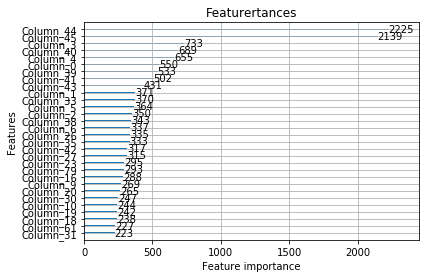

--------------------------- 保存预测文件 ---------------------


In [3]:

now_phase = 0


for phase in range(now_phase, now_phase + 1):  
    print('phase:', phase)
    """
    train_test: 训练测试点击数据
    item_hot_list: 项目热度list
    dict_label_user_item: 训练点击中用户——最后一次点击项目字典
    item_hot_dict: 项目热度字典
    time_feat：用户点击时间特征
    
    """
    click_all, test_user_set = load_click_data(phase, nrows=nrows)
    train_test, item_hot_list, dict_label_user_item, item_hot_dict, time_feat = data_generate(click_all, test_user_set)

    
    
    print('==================================== 召回 ====================================')
    
    # TODO: 增加其它召回
    if topk_recall_read:
        topk_recall = pd.read_pickle('../data/recall/topk_recall_{phase}.pkl'.format(phase=phase))
        matrix_association_rules = np.load('../data/recall/matrix_association_rules_{phase}.npy'.format(phase=phase), allow_pickle=True).item()

    else:
        topk_recall, matrix_association_rules = topk_recall_association_rules_qyxs_icf(
                                                click_all=train_test,
                                                dict_label=dict_label_user_item, 
                                                k=recall_num
                                                )
        topk_recall.to_pickle('../data/recall/topk_recall_{phase}.pkl'.format(phase=phase))
        np.save('../data/recall/matrix_association_rules_{phase}.npy'.format(phase=phase), matrix_association_rules)


    print('-------- 评测召回效果 -------------')
    hit_rate = metrics_recall(topk_recall=topk_recall, phase=phase, k=recall_num, sep=int(recall_num/10))
    print('召回TOP:{k}时, 命中百分比:{hit_rate}'.format(k=recall_num, hit_rate=hit_rate))

    
    
    print('==================================== 排序 ====================================')
    print('-------- 构建特征 ---------')
    
    dim, epochs, learning_rate = 30, 15, 0.1 # 由于内存问题，size改回30
    if embedding_feat_read:
        print('-------- sku1 sku2 sku3 sku4 sku5 user ----------')
        dict_embedding_all_ui_item = np.load('../data/embedding/dict_embedding_all_ui_item_{phase}.npy'.format(phase=phase), 
                                             allow_pickle=True).item()
        
        print('------- user1 user2 user3 user4 user5 sku -------')
        dict_embedding_all_ui_user = np.load('../data/embedding/dict_embedding_all_ui_user_{phase}.npy'.format(phase=phase), 
                                             allow_pickle=True).item()
        
        print('------- item1 item2 item3 item4 item5 -------')
        dict_embedding_item_only = np.load('../data/embedding/dict_embedding_item_only_{phase}.npy'.format(phase=phase), 
                                           allow_pickle=True).item()
        
        print('------- user1 user2 user3 user4 user5 -------')
        dict_embedding_user_only = np.load('../data/embedding/dict_embedding_user_only_{phase}.npy'.format(phase=phase), 
                                           allow_pickle=True).item()

    else:
        print('-------- sku1 sku2 sku3 sku4 sku5 user ----------')
        dict_embedding_all_ui_item = matrix_word2vec_embedding(
                                                                click_all=train_test,
                                                                flag='item',
                                                                mode='all',
                                                                dim=dim,
                                                                epochs=epochs,
                                                                learning_rate=learning_rate
                                                                )
        np.save('../data/embedding/dict_embedding_all_ui_item_{phase}.npy'.format(phase=phase),
               dict_embedding_all_ui_item)


        print('------- user1 user2 user3 user4 user5 sku -------')
        dict_embedding_all_ui_user = matrix_word2vec_embedding(
                                                                click_all=train_test,
                                                                flag='user',
                                                                mode='all',
                                                                dim=dim,
                                                                epochs=epochs,
                                                                learning_rate=learning_rate
                                                                )
        np.save('../data/embedding/dict_embedding_all_ui_user_{phase}.npy'.format(phase=phase),
               dict_embedding_all_ui_user)


        print('------- item1 item2 item3 item4 item5 -------')
        dict_embedding_item_only = matrix_word2vec_embedding(
                                                                click_all=train_test,
                                                                flag='item',
                                                                mode='only',
                                                                dim=dim,
                                                                epochs=epochs,
                                                                learning_rate=learning_rate
                                                                )
        np.save('../data/embedding/dict_embedding_item_only_{phase}.npy'.format(phase=phase),
               dict_embedding_item_only)


        print('------- user1 user2 user3 user4 user5 -------')
        dict_embedding_user_only = matrix_word2vec_embedding(
                                                                click_all=train_test,
                                                                flag='user',
                                                                mode='only',
                                                                dim=dim,
                                                                epochs=epochs,
                                                                learning_rate=learning_rate
                                                                )
        np.save('../data/embedding/dict_embedding_user_only_{phase}.npy'.format(phase=phase),
               dict_embedding_user_only)

        
    
    print('------- Interactive Embedding Feature PCA -----------')

    # dict_embedding_all_ui_item PCA
    dict_embedding = dict_embedding_all_ui_item.copy()
    dict_embedding_all_ui_item = {}
    for i in ['user', 'item']:
        tmp = pd.DataFrame(dict_embedding[i])
        pca_ = embedding_fea_pca(tmp.T, n_components=pca_n_components) # 解释
        tmp_pca = pd.DataFrame(pca_.T)
        tmp_pca.columns = tmp.columns
        dict_embedding_all_ui_item[i] = dict(tmp_pca)
    
    
    # dict_embedding_all_ui_user PCA
    dict_embedding = dict_embedding_all_ui_user.copy()
    dict_embedding_all_ui_user = {}
    for i in ['user', 'item']:
        tmp = pd.DataFrame(dict_embedding[i])
        pca_ = embedding_fea_pca(tmp.T, n_components=pca_n_components) # 解释
        tmp_pca = pd.DataFrame(pca_.T)
        tmp_pca.columns = tmp.columns
        dict_embedding_all_ui_user[i] = dict(tmp_pca)
    print('dict_embedding_all_ui_user是否降维成功........', len(dict_embedding_all_ui_user['user']['1']))    
    del tmp, tmp_pca

    
    
    print('------- user or item Embedding Feature Cluster -----------')

    # dict_embedding_item_only聚类
    item = pd.DataFrame(dict_embedding_item_only['item'])
    km_cluster = KMeans(n_clusters=item_n_clusters, max_iter=300, n_init=40, \
                        init='k-means++') #, n_jobs=-1)
    # 返回类索引
    result = km_cluster.fit_predict(item.T)
    item_cluster = pd.DataFrame({'item_id': item.columns, 'item_cluster': np.int16(result)})
    del item, km_cluster, result, dict_embedding_item_only
    
    # dict_embedding_user_only聚类
    user = pd.DataFrame(dict_embedding_user_only['user'])
    km_cluster = KMeans(n_clusters=user_n_clusters, max_iter=300, n_init=40, \
                        init='k-means++') #, n_jobs=-1)
    # 返回类索引
    result = km_cluster.fit_predict(user.T)
    user_cluster = pd.DataFrame({'user_id': user.columns, 'user_cluster': np.int16(result)})
    del user, km_cluster, result, dict_embedding_user_only
    
    
    # 加载聚类的统计特征
    user_cluster_feat_ = user_cluster_feat(click_all, user_cluster)
    item_cluster_feat_ = item_cluster_feat(click_all, item_cluster)

    del click_all, user_cluster, item_cluster
    
    
    print('------- 特征加工 -----------')

    print('..............topk_recall shape:', topk_recall.shape)

    
#     feature_all = get_train_test_data(topk_recall,
#                   matrix_association_rules, 
#                   time_feat,
#                   user_cluster_feat_,
#                   item_cluster_feat_,
#                   item_hot_dict,
#                   txt_cosine_similarity_dict,
#                   img_cosine_similarity_dict,
#                   dict_embedding_all_ui_item,
#                   dict_embedding_all_ui_user,
#                   flag_test,
#                   click_topn)


#     lprofiler = LineProfiler(get_train_test_data)
#     lprofiler.run('get_train_test_data( topk_recall[:80000], matrix_association_rules, time_feat, user_cluster_feat_, item_cluster_feat_, item_hot_dict, txt_cosine_similarity_dict, img_cosine_similarity_dict, dict_embedding_all_ui_item, dict_embedding_all_ui_user, flag_test=False, click_topn=click_topn)')
#     lprofiler.print_stats()


    # 多进程构建特征
    if __name__=='__main__':
        cpu_num = cpu_count()
        pool = Pool(5+1) # 创建一个多个进程的进程池
        feature_part = []
        # 将topk_recall分5批次，并不是越大越好，启动进程也是需时间的
        batch_size = topk_recall.shape[0]//(5)
        
        for batch in range(5):
            start_index = batch * batch_size
            if batch==cpu_num:
                end_index = topk_recall.shape[0]
            else:
                end_index = (1+batch) * batch_size
            feature_part.append(pool.apply_async(func=get_train_test_data, 
                                                 args=(topk_recall[start_index:end_index],
                                                       matrix_association_rules, 
                                                       time_feat,
                                                       user_cluster_feat_,
                                                       item_cluster_feat_,
                                                       item_hot_dict,
                                                       txt_cosine_similarity_dict,
                                                       img_cosine_similarity_dict,
                                                       dict_embedding_all_ui_item,
                                                       dict_embedding_all_ui_user,
                                                       flag_test,
                                                       click_topn)))            
        pool.close()
        pool.join() 
        
        """
        遍历result列表，取出子进程对象，访问get()方法，获取返回值。（此时所有子进程已执行完毕）
        result[0].get()
        """
        print('进程结束') 
     
    
    
#     # 释放内存
# #     del topk_recall, matrix_association_rules, txt_cosine_similarity_dict, img_cosine_similarity_dict, dict_embedding_all_ui_item, dict_embedding_all_ui_user, dict_embedding_item_only, dict_embedding_user_only
      
    print('分片特征数据拼接')
    feature_all = Pool_feature_concat(feature_part)
    print('feature_all的列: ', feature_all.columns)
    print(feature_all.head(2))


    feature_all = add_time_statistics(feature_all, time_feat)
    feature_all = add_user_statistics(feature_all, user_cluster_feat_)
    feature_all = add_item_statistics(feature_all, item_cluster_feat_)
    

    print('特征数据保存')
    feature_all.to_pickle("../data/process/feature_all_phase{phase}_0002.pkl".format(phase=phase))
    
    ############################## 整体数据特征 ############################## 
    print('--------------------------- 特征数据 ---------------------')
    len_f = len(feature_all)
    len_train = len(feature_all[feature_all['train_flag']=='train'])
    len_test = len(feature_all[feature_all['train_flag']=='test'])
    len_train_1 = len(feature_all[(feature_all['train_flag']=='train') & (feature_all['label']== 1)]) 
    print('所有数据条数', len_f)
    print('训练数据 : ', len_train)
    print('训练数据 label 1 : ', len_train_1)
    print('训练数据 1 / 0 rate : ', len_train_1 * 1.0 / len_f)
    print('测试数据 : ' , len_test)
    print('flag : ', set(feature_all['train_flag']))

    
    ############################## 训练模型 ############################## 
    print('--------------------------- 训练模型 ---------------------')
    submit = train_model_lgb(feature_all, recall_rate=hit_rate, hot_list=item_hot_list, valid=0.2, topk=50, 
                             num_boost_round=1500, early_stopping_rounds=500)

    
    # submit = train_model_rf(feature_all, recall_rate=hit_rate, hot_list=item_hot_list, valid=0.2, topk=50)
    

    print('--------------------------- 保存预测文件 ---------------------')
    phase_submit_save(submit, phase, 50)


In [4]:
# res7 = pd.read_csv("../result/submit-wanping7-7-2020-06-07 19:12:01.csv", header=None)
# res8 = pd.read_csv("../result/submit-wanping7-8-2020-06-07 17:07:39.csv", header=None)
# res9 = pd.read_csv("../result/submit-wanping7-9-2020-06-07 18:13:02.csv", header=None)
# res = pd.concat([res7, res8, res9], axis=0)
# res.to_csv("../result/submit_traceb_v1.csv", header=None, index=False)

# res.shape
# # (5367, 51)